# Computational Intelligence: Gebärdenspracherkennung mit Computer Vision
Milan Daniel Larsen


In [1]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib
# Installation der benötigten packete

Importierung der benutzten libs:

In [3]:
import cv2 
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import itertools
import pandas as pd

# 1. Keypoint Auswertung mit MediaPipe

MediaPipe ist ein framwork von Google für Vision based Ai und ermöglicht es uns einfach bewegungen der Hände und des Körpers zu extrahieren. 
Dies vereinfacht es Gesten richtig zu erkennen als ausschlißlich durrhc ein CNN. Dadurch reduziert sich auch die Datenmengen, die wir für eine ausreichend genau bestimmung der Gesten benötigen.


In [4]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils # drawing utilities

Es wird eine Funktion "mediapip_detection" definiert. Diese verarbeitet ein Bild mit hilfe der MediaPipe und dem vorher definierten "holistic" Model.
Das holistische Model ermöglicht es uns Haltung, Gesicht und Hände zu anaylsieren und zu erkennen.

In [5]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # BGR zu RGB
    image.flags.writeable = False # Bild nicht mehr beschreibar
    results = model.process(image) #  MediaPipe auswetung
    image.flags.writeable = True # Bild wieder beschreibar
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) # RBG zu BGR
    return image, results # Bild und Ergebnis Zurückgeben

Anschließend wird die Funktion "draw_landmarks" implenentiert, die für die Darstellung der landmarks benutzt wird.
Landmarks werden die verschiedenen Ankerpunkte des trackings genannt.
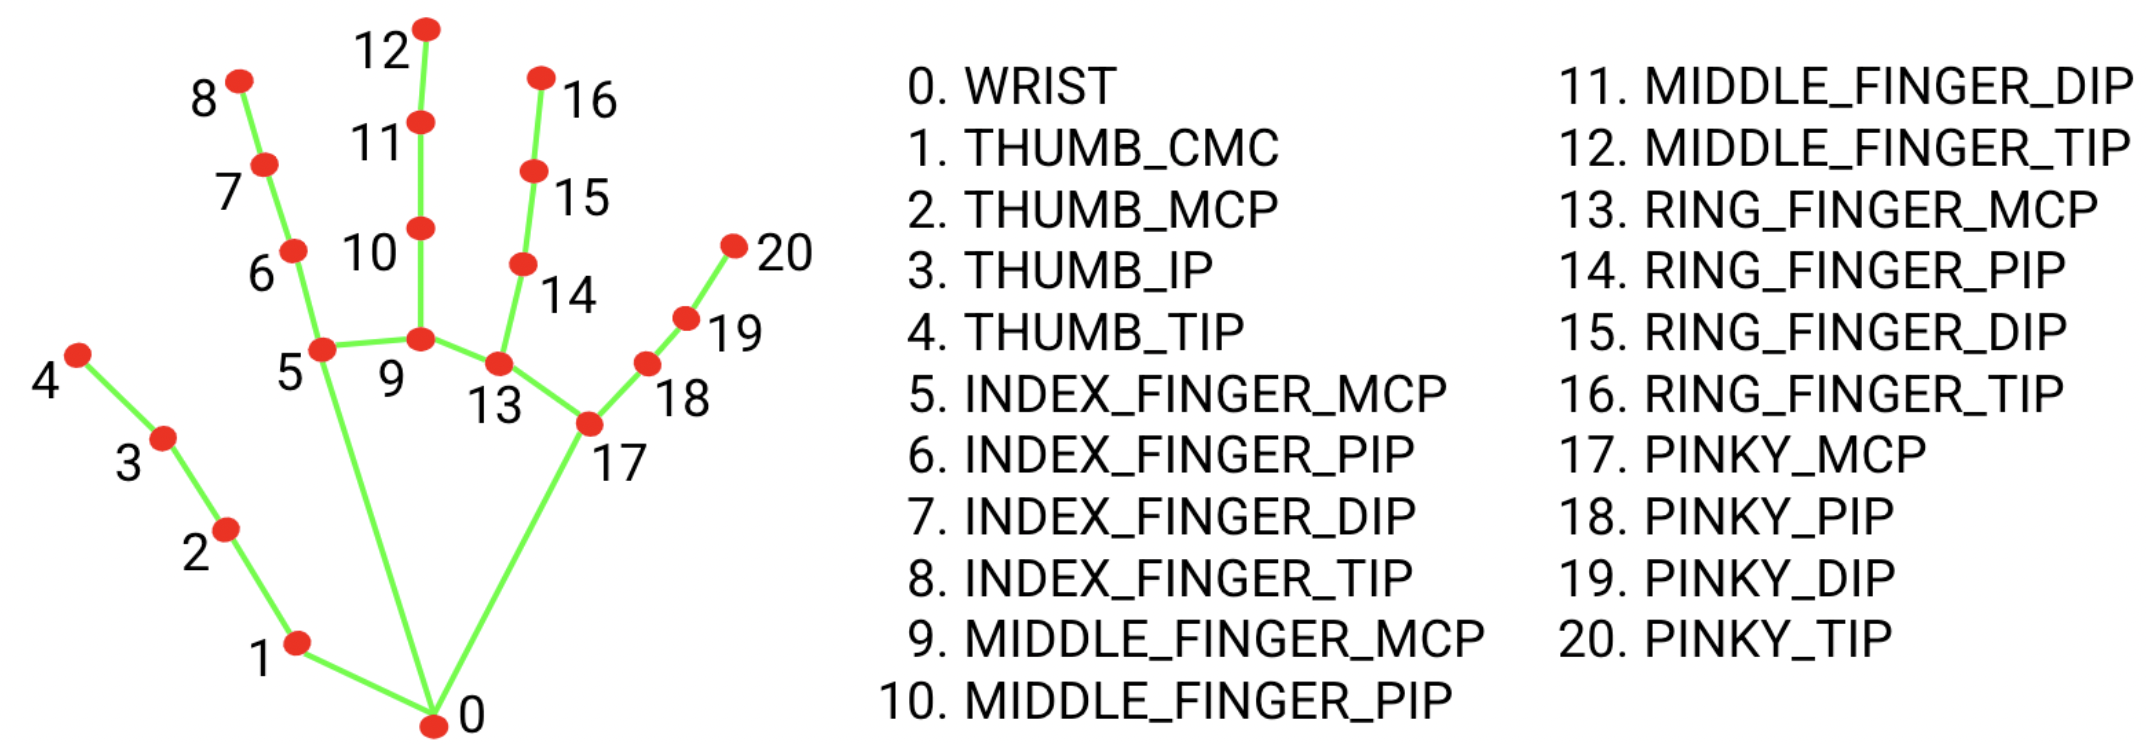

Für die Hand stehen 21 Landmarks zu Verfügung. 




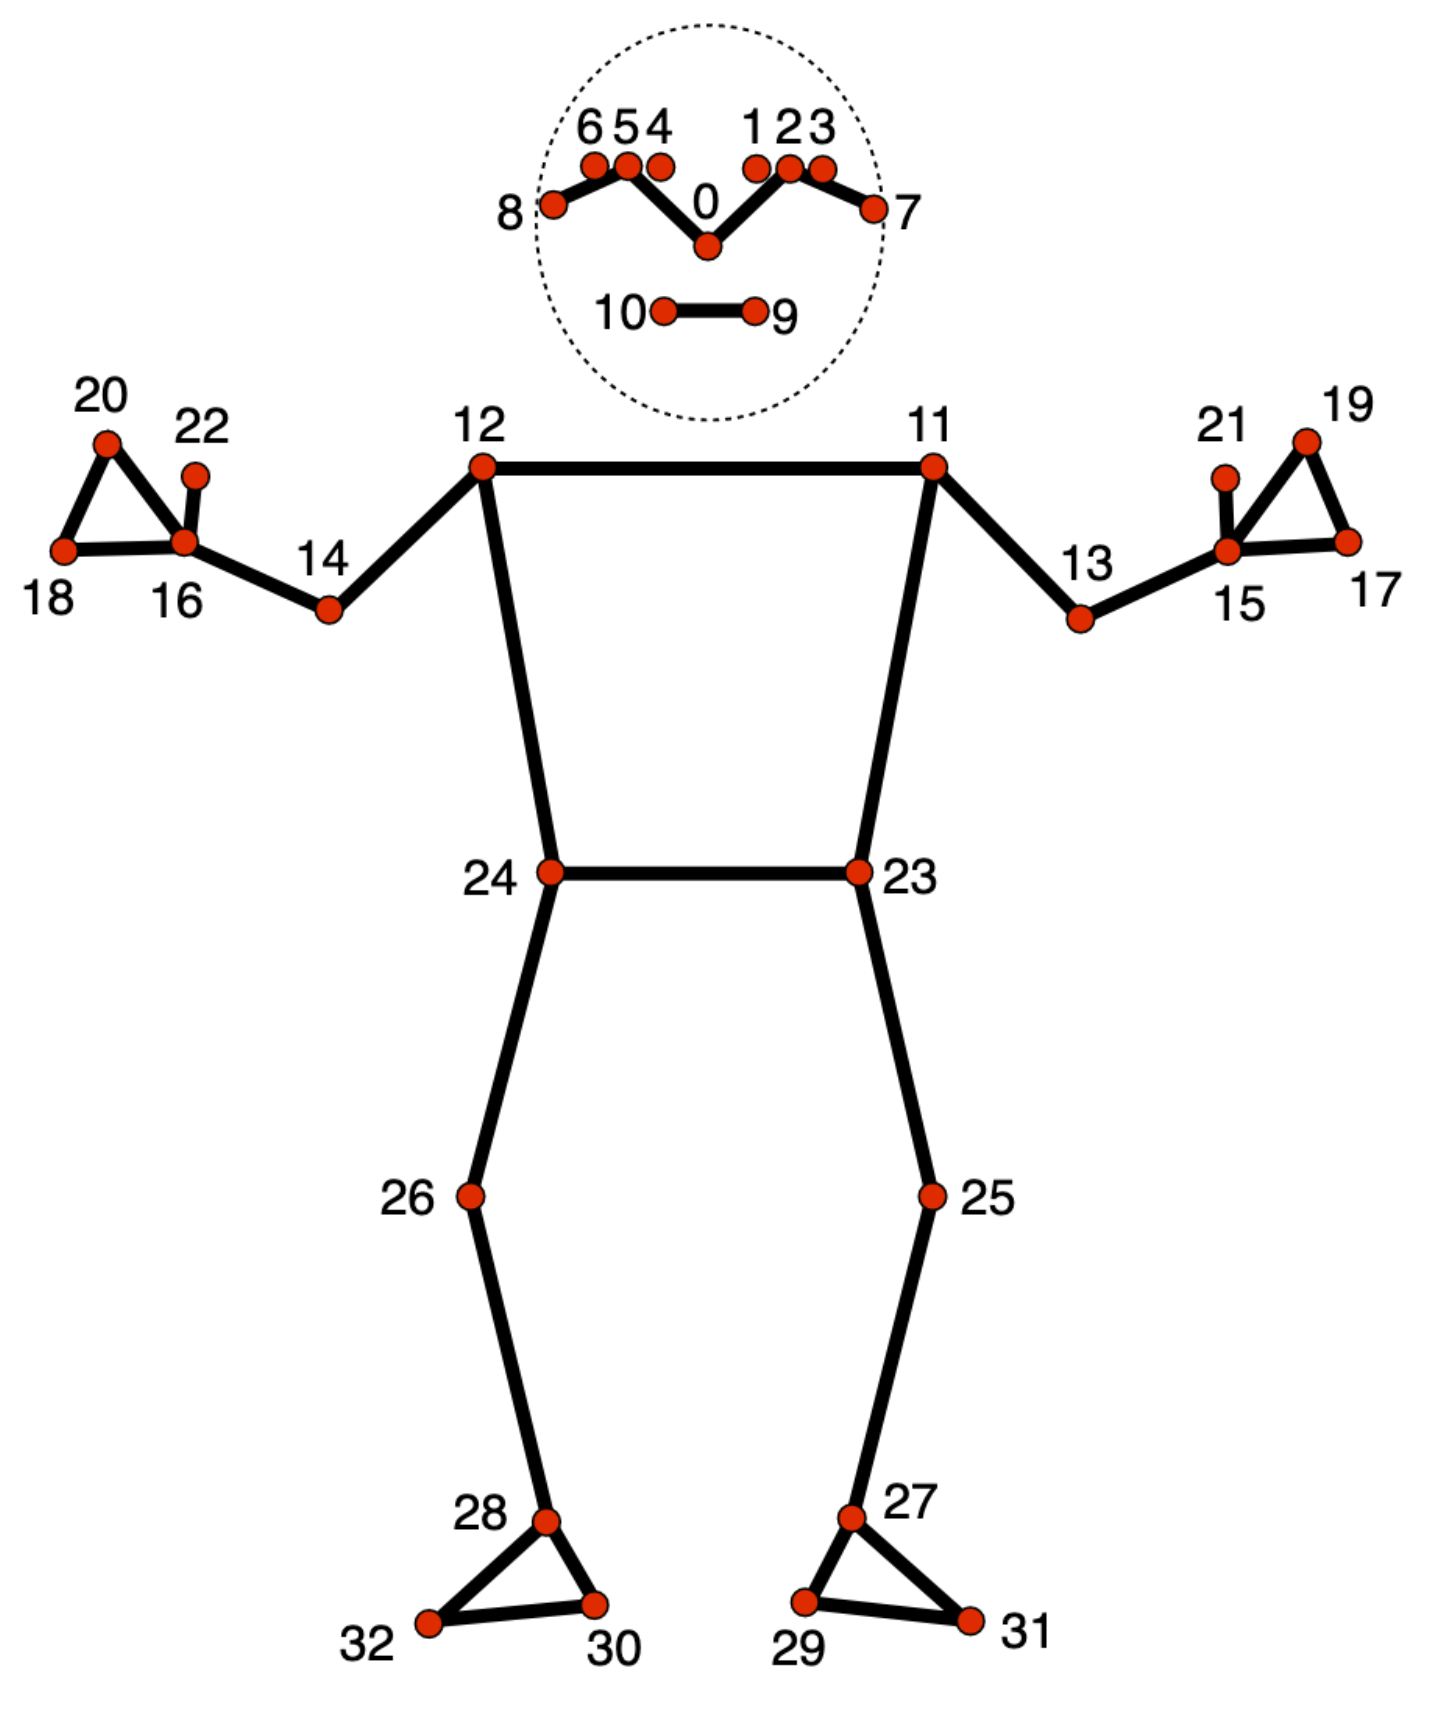
Für die pose stehen 33 landmarks zur verfügung

In [54]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(0,0,255),thickness=1,circle_radius=1), # Farbe der Punkte
                             mp_drawing.DrawingSpec(color=(250,206,135),thickness=1,circle_radius=4)) # Farbe des meshes
     # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
     # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )                

In [21]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(238,229,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [70]:
aufnahme =cv2.VideoCapture(1) # Webcam auswählen
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while aufnahme.isOpened(): 

        # Lesen der Webcam
        ret,frame =aufnahme.read()
        
        # 
        image, results = mediapipe_detection(frame,holistic)
        myhand=results.left_hand_landmarks
        
        print(myhand)
        # Landmarks zeichnen
        draw_landmarks(image,results)
        
        # Abspielen des feeds
        cv2.imshow('OpenCV Feed',image)

        # Exit
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
landmark {
  x: 0.8238058686256409
  y: 1.0952460765838623
  z: 1.9641881010556972e-07
}
landmark {
  x: 0.7736486196517944
  y: 1.0424939393997192
  z: -0.016627546399831772
}
landmark {
  x: 0.7408273816108704
  y: 0.9749100208282471
  z: -0.030053701251745224
}
landmark {
  x: 0.7231248021125793
  y: 0.917812705039978
  z: -0.04235435277223587
}
landmark {
  x: 0.7197046279907227
  y: 0.8634954690933228
  z: -0.05361022800207138
}
landmark {
  x: 0.7988035082817078
  y: 0.9047309756278992
  z: -0.027572166174650

landmark {
  x: 0.8936805725097656
  y: 0.6047797203063965
  z: 3.2570375196883106e-07
}
landmark {
  x: 0.8134731650352478
  y: 0.6450141668319702
  z: -0.03329774737358093
}
landmark {
  x: 0.7310605049133301
  y: 0.6310917139053345
  z: -0.05064918473362923
}
landmark {
  x: 0.6754894852638245
  y: 0.5809949636459351
  z: -0.06528101116418839
}
landmark {
  x: 0.6246840357780457
  y: 0.5375552177429199
  z: -0.07964169234037399
}
landmark {
  x: 0.6996755599975586
  y: 0.4917778968811035
  z: -0.033224210143089294
}
landmark {
  x: 0.6231092214584351
  y: 0.43119025230407715
  z: -0.061928633600473404
}
landmark {
  x: 0.5775694847106934
  y: 0.39284104108810425
  z: -0.08358785510063171
}
landmark {
  x: 0.5406366586685181
  y: 0.35703641176223755
  z: -0.09927918016910553
}
landmark {
  x: 0.727237343788147
  y: 0.4351606070995331
  z: -0.0368221141397953
}
landmark {
  x: 0.6478936076164246
  y: 0.35809269547462463
  z: -0.0627407655119896
}
landmark {
  x: 0.6009209752082825
  y

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


landmark {
  x: 0.7212138772010803
  y: 0.7732208967208862
  z: 3.8156787240950507e-07
}
landmark {
  x: 0.6751960515975952
  y: 0.7308756113052368
  z: -0.016095347702503204
}
landmark {
  x: 0.645344078540802
  y: 0.6721721887588501
  z: -0.024176398292183876
}
landmark {
  x: 0.6338766813278198
  y: 0.622154712677002
  z: -0.031842898577451706
}
landmark {
  x: 0.6234469413757324
  y: 0.5816302299499512
  z: -0.03885014355182648
}
landmark {
  x: 0.6968728303909302
  y: 0.5898985266685486
  z: -0.008558445610105991
}
landmark {
  x: 0.7009641528129578
  y: 0.5233912467956543
  z: -0.020307542756199837
}
landmark {
  x: 0.7047476768493652
  y: 0.48266440629959106
  z: -0.031801074743270874
}
landmark {
  x: 0.7095658183097839
  y: 0.4478747248649597
  z: -0.040659140795469284
}
landmark {
  x: 0.7272722721099854
  y: 0.5908747911453247
  z: -0.012094385921955109
}
landmark {
  x: 0.7338903546333313
  y: 0.5165481567382812
  z: -0.021340925246477127
}
landmark {
  x: 0.738982081413269

landmark {
  x: 0.640305757522583
  y: 0.7234741449356079
  z: 3.294304633527645e-07
}
landmark {
  x: 0.590346097946167
  y: 0.6974101066589355
  z: -0.021593302488327026
}
landmark {
  x: 0.5519631505012512
  y: 0.6480283737182617
  z: -0.03470610827207565
}
landmark {
  x: 0.5294221043586731
  y: 0.6011059284210205
  z: -0.0458688922226429
}
landmark {
  x: 0.5073369741439819
  y: 0.5620939135551453
  z: -0.057273924350738525
}
landmark {
  x: 0.5893741846084595
  y: 0.5574306845664978
  z: -0.027796054258942604
}
landmark {
  x: 0.5786803960800171
  y: 0.4855344295501709
  z: -0.0460735559463501
}
landmark {
  x: 0.5723470449447632
  y: 0.4427409768104553
  z: -0.059794433414936066
}
landmark {
  x: 0.5682637095451355
  y: 0.40380942821502686
  z: -0.0702701285481453
}
landmark {
  x: 0.6226034760475159
  y: 0.5531145930290222
  z: -0.03190930560231209
}
landmark {
  x: 0.6188340783119202
  y: 0.4717615842819214
  z: -0.04886537790298462
}
landmark {
  x: 0.6154277920722961
  y: 0.

landmark {
  x: 0.6217162013053894
  y: 0.6009001731872559
  z: 4.790837806467607e-07
}
landmark {
  x: 0.5673368573188782
  y: 0.5748439431190491
  z: -0.02086675725877285
}
landmark {
  x: 0.5289198160171509
  y: 0.5254029631614685
  z: -0.032592933624982834
}
landmark {
  x: 0.5073849558830261
  y: 0.4765862226486206
  z: -0.04261854290962219
}
landmark {
  x: 0.4856106638908386
  y: 0.4379124045372009
  z: -0.05248970538377762
}
landmark {
  x: 0.5670157074928284
  y: 0.4263428747653961
  z: -0.019991017878055573
}
landmark {
  x: 0.5564419031143188
  y: 0.3528359532356262
  z: -0.03574120253324509
}
landmark {
  x: 0.5507653951644897
  y: 0.3065900206565857
  z: -0.049417972564697266
}
landmark {
  x: 0.5474672317504883
  y: 0.26586252450942993
  z: -0.05974366143345833
}
landmark {
  x: 0.5979606509208679
  y: 0.4198753535747528
  z: -0.023143719881772995
}
landmark {
  x: 0.5914003252983093
  y: 0.33654987812042236
  z: -0.03709309548139572
}
landmark {
  x: 0.5855898857116699
 

landmark {
  x: 0.5398711562156677
  y: 0.430742472410202
  z: 3.4649298186195665e-07
}
landmark {
  x: 0.48877787590026855
  y: 0.4129626154899597
  z: -0.022850802168250084
}
landmark {
  x: 0.44516822695732117
  y: 0.3692370355129242
  z: -0.03610225394368172
}
landmark {
  x: 0.41646239161491394
  y: 0.3231876790523529
  z: -0.04753018170595169
}
landmark {
  x: 0.39096832275390625
  y: 0.28283390402793884
  z: -0.05858137086033821
}
landmark {
  x: 0.4690951108932495
  y: 0.2644701302051544
  z: -0.022466927766799927
}
landmark {
  x: 0.45015817880630493
  y: 0.19316956400871277
  z: -0.04014478623867035
}
landmark {
  x: 0.43795543909072876
  y: 0.15056638419628143
  z: -0.05460473522543907
}
landmark {
  x: 0.428501158952713
  y: 0.11110475659370422
  z: -0.06575026363134384
}
landmark {
  x: 0.4972470998764038
  y: 0.25001147389411926
  z: -0.025890469551086426
}
landmark {
  x: 0.48192065954208374
  y: 0.16574671864509583
  z: -0.041772544384002686
}
landmark {
  x: 0.47054392

landmark {
  x: 0.6140831112861633
  y: 0.664336085319519
  z: 1.9296747666430747e-07
}
landmark {
  x: 0.570631206035614
  y: 0.6459412574768066
  z: -0.029193321242928505
}
landmark {
  x: 0.5387526154518127
  y: 0.5964909791946411
  z: -0.048230431973934174
}
landmark {
  x: 0.5245521068572998
  y: 0.5492778420448303
  z: -0.0635204091668129
}
landmark {
  x: 0.5055944323539734
  y: 0.5100066661834717
  z: -0.07966381311416626
}
landmark {
  x: 0.5869268178939819
  y: 0.4949212968349457
  z: -0.04845880717039108
}
landmark {
  x: 0.5823686122894287
  y: 0.41136857867240906
  z: -0.07113078981637955
}
landmark {
  x: 0.5814337134361267
  y: 0.3730528652667999
  z: -0.0868581160902977
}
landmark {
  x: 0.5803804993629456
  y: 0.33581918478012085
  z: -0.09865151345729828
}
landmark {
  x: 0.6216956377029419
  y: 0.4946182668209076
  z: -0.05122906342148781
}
landmark {
  x: 0.6258020401000977
  y: 0.4047372043132782
  z: -0.07176000624895096
}
landmark {
  x: 0.6262369155883789
  y: 0

landmark {
  x: 0.6169846057891846
  y: 0.9126943945884705
  z: 4.452970756574359e-07
}
landmark {
  x: 0.5717486143112183
  y: 0.8752102851867676
  z: -0.024777796119451523
}
landmark {
  x: 0.5389084815979004
  y: 0.828099250793457
  z: -0.04418884217739105
}
landmark {
  x: 0.5182516574859619
  y: 0.7877300977706909
  z: -0.06127724424004555
}
landmark {
  x: 0.4997965693473816
  y: 0.7501731514930725
  z: -0.07884293794631958
}
landmark {
  x: 0.591213047504425
  y: 0.7387263178825378
  z: -0.04125804826617241
}
landmark {
  x: 0.5943412780761719
  y: 0.664677083492279
  z: -0.06450142711400986
}
landmark {
  x: 0.5937786102294922
  y: 0.6198098659515381
  z: -0.08083877712488174
}
landmark {
  x: 0.593911349773407
  y: 0.5792875289916992
  z: -0.09283186495304108
}
landmark {
  x: 0.6264507174491882
  y: 0.7484281659126282
  z: -0.046449627727270126
}
landmark {
  x: 0.6381144523620605
  y: 0.6669119596481323
  z: -0.06798116117715836
}
landmark {
  x: 0.6443522572517395
  y: 0.61

landmark {
  x: 0.6259379982948303
  y: 0.7867969870567322
  z: 5.339394419934251e-07
}
landmark {
  x: 0.5781894326210022
  y: 0.7511034607887268
  z: -0.024591054767370224
}
landmark {
  x: 0.5428066849708557
  y: 0.7031980156898499
  z: -0.04327061399817467
}
landmark {
  x: 0.5195097923278809
  y: 0.6608715057373047
  z: -0.059534259140491486
}
landmark {
  x: 0.49857404828071594
  y: 0.6231428384780884
  z: -0.07628954946994781
}
landmark {
  x: 0.5911311507225037
  y: 0.6068020462989807
  z: -0.038430970162153244
}
landmark {
  x: 0.5905294418334961
  y: 0.5262989401817322
  z: -0.060661692172288895
}
landmark {
  x: 0.5900854468345642
  y: 0.4776654839515686
  z: -0.07705911248922348
}
landmark {
  x: 0.5909000635147095
  y: 0.434571772813797
  z: -0.0888204276561737
}
landmark {
  x: 0.6256510019302368
  y: 0.6126564741134644
  z: -0.043026454746723175
}
landmark {
  x: 0.6326407194137573
  y: 0.5225694179534912
  z: -0.06330419331789017
}
landmark {
  x: 0.6358415484428406
  y

landmark {
  x: 0.5919443964958191
  y: 0.5014201402664185
  z: 4.153392865191563e-07
}
landmark {
  x: 0.5388343334197998
  y: 0.47410568594932556
  z: -0.023360054939985275
}
landmark {
  x: 0.4964509606361389
  y: 0.42485421895980835
  z: -0.03677746653556824
}
landmark {
  x: 0.4743492603302002
  y: 0.37220171093940735
  z: -0.04835161566734314
}
landmark {
  x: 0.46060168743133545
  y: 0.3268159329891205
  z: -0.059276238083839417
}
landmark {
  x: 0.5323939323425293
  y: 0.3140447437763214
  z: -0.021181529387831688
}
landmark {
  x: 0.5153384208679199
  y: 0.23934373259544373
  z: -0.03944765776395798
}
landmark {
  x: 0.5030151605606079
  y: 0.19294312596321106
  z: -0.05489851534366608
}
landmark {
  x: 0.4929009974002838
  y: 0.15065832436084747
  z: -0.06664754450321198
}
landmark {
  x: 0.5631511807441711
  y: 0.3040638267993927
  z: -0.02368902787566185
}
landmark {
  x: 0.5543484091758728
  y: 0.21761199831962585
  z: -0.04019484296441078
}
landmark {
  x: 0.5454159975051

landmark {
  x: 0.6055576801300049
  y: 0.5572682023048401
  z: 2.763540578598622e-07
}
landmark {
  x: 0.5570914149284363
  y: 0.5229730010032654
  z: -0.024934301152825356
}
landmark {
  x: 0.5212268829345703
  y: 0.46721506118774414
  z: -0.04015132039785385
}
landmark {
  x: 0.502128541469574
  y: 0.4136490225791931
  z: -0.05348101630806923
}
landmark {
  x: 0.4913458526134491
  y: 0.36362114548683167
  z: -0.06624540686607361
}
landmark {
  x: 0.562900722026825
  y: 0.36666199564933777
  z: -0.02842583879828453
}
landmark {
  x: 0.5501334071159363
  y: 0.28313499689102173
  z: -0.050419729202985764
}
landmark {
  x: 0.5416255593299866
  y: 0.2341526299715042
  z: -0.06750675290822983
}
landmark {
  x: 0.5359237194061279
  y: 0.1902589201927185
  z: -0.07997895777225494
}
landmark {
  x: 0.5967451930046082
  y: 0.36195847392082214
  z: -0.03240149840712547
}
landmark {
  x: 0.5925676822662354
  y: 0.26607781648635864
  z: -0.052093155682086945
}
landmark {
  x: 0.5872410535812378


landmark {
  x: 0.6050017476081848
  y: 0.8465379476547241
  z: 2.557801792590908e-07
}
landmark {
  x: 0.5542901158332825
  y: 0.798392653465271
  z: -0.026099614799022675
}
landmark {
  x: 0.5239278078079224
  y: 0.7291772365570068
  z: -0.041789598762989044
}
landmark {
  x: 0.5136947631835938
  y: 0.6651431918144226
  z: -0.05536191910505295
}
landmark {
  x: 0.5057695508003235
  y: 0.6076200008392334
  z: -0.0686681792140007
}
landmark {
  x: 0.5813164710998535
  y: 0.6464153528213501
  z: -0.030376283451914787
}
landmark {
  x: 0.5785950422286987
  y: 0.5599660873413086
  z: -0.05283312126994133
}
landmark {
  x: 0.5771443843841553
  y: 0.5094558000564575
  z: -0.06968604028224945
}
landmark {
  x: 0.5774106979370117
  y: 0.4642166495323181
  z: -0.08241862803697586
}
landmark {
  x: 0.6190748810768127
  y: 0.6527031064033508
  z: -0.03532799333333969
}
landmark {
  x: 0.6308491230010986
  y: 0.5584402680397034
  z: -0.05563691258430481
}
landmark {
  x: 0.6365818977355957
  y: 0

landmark {
  x: 0.6140912771224976
  y: 0.8939692974090576
  z: 4.1411999518459197e-07
}
landmark {
  x: 0.5662595629692078
  y: 0.850645899772644
  z: -0.0260626133531332
}
landmark {
  x: 0.5339280962944031
  y: 0.7860113978385925
  z: -0.04291720315814018
}
landmark {
  x: 0.5195090174674988
  y: 0.7300530076026917
  z: -0.05701247602701187
}
landmark {
  x: 0.5105066299438477
  y: 0.6783660054206848
  z: -0.07105701416730881
}
landmark {
  x: 0.5934950709342957
  y: 0.6959161162376404
  z: -0.035448987036943436
}
landmark {
  x: 0.59478360414505
  y: 0.6143065690994263
  z: -0.05850279703736305
}
landmark {
  x: 0.5940455198287964
  y: 0.5642905831336975
  z: -0.07568490505218506
}
landmark {
  x: 0.5943936705589294
  y: 0.5192362070083618
  z: -0.08850161731243134
}
landmark {
  x: 0.6308026909828186
  y: 0.7044090032577515
  z: -0.03983572870492935
}
landmark {
  x: 0.6423535943031311
  y: 0.6156686544418335
  z: -0.06063572317361832
}
landmark {
  x: 0.6482313871383667
  y: 0.55

landmark {
  x: 0.6145710349082947
  y: 0.9025156497955322
  z: 4.2621454099389666e-07
}
landmark {
  x: 0.5666339993476868
  y: 0.8593518733978271
  z: -0.026660745963454247
}
landmark {
  x: 0.5339759588241577
  y: 0.7972752451896667
  z: -0.044536419212818146
}
landmark {
  x: 0.5192968249320984
  y: 0.7451662421226501
  z: -0.059619300067424774
}
landmark {
  x: 0.5121148228645325
  y: 0.6963112950325012
  z: -0.074709951877594
}
landmark {
  x: 0.5935507416725159
  y: 0.706020712852478
  z: -0.03930696099996567
}
landmark {
  x: 0.5959255695343018
  y: 0.6222748160362244
  z: -0.06375270336866379
}
landmark {
  x: 0.5960409641265869
  y: 0.5705572366714478
  z: -0.08136128634214401
}
landmark {
  x: 0.5971835255622864
  y: 0.5243219137191772
  z: -0.09417205303907394
}
landmark {
  x: 0.6305862665176392
  y: 0.7163984775543213
  z: -0.04351853206753731
}
landmark {
  x: 0.6443411707878113
  y: 0.6281219124794006
  z: -0.06535458564758301
}
landmark {
  x: 0.6515117883682251
  y: 0

landmark {
  x: 0.6230641603469849
  y: 0.9202361106872559
  z: 3.8648389022455376e-07
}
landmark {
  x: 0.5734588503837585
  y: 0.8731935024261475
  z: -0.026368768885731697
}
landmark {
  x: 0.5449654459953308
  y: 0.8007562756538391
  z: -0.04179741069674492
}
landmark {
  x: 0.5363341569900513
  y: 0.7376511096954346
  z: -0.05435365065932274
}
landmark {
  x: 0.5314038991928101
  y: 0.6794421672821045
  z: -0.06670497357845306
}
landmark {
  x: 0.6014852523803711
  y: 0.7228918075561523
  z: -0.03501546382904053
}
landmark {
  x: 0.605430006980896
  y: 0.6399471759796143
  z: -0.058176763355731964
}
landmark {
  x: 0.6074222922325134
  y: 0.5892953872680664
  z: -0.07476726174354553
}
landmark {
  x: 0.6109212636947632
  y: 0.5438600778579712
  z: -0.08702332526445389
}
landmark {
  x: 0.6388570666313171
  y: 0.733742356300354
  z: -0.03869909048080444
}
landmark {
  x: 0.6518306136131287
  y: 0.6470194458961487
  z: -0.0597425177693367
}
landmark {
  x: 0.6583374738693237
  y: 0.

landmark {
  x: 0.6234588027000427
  y: 0.9433622360229492
  z: 3.2304853903042385e-07
}
landmark {
  x: 0.5736798644065857
  y: 0.8901893496513367
  z: -0.02254149317741394
}
landmark {
  x: 0.5491296648979187
  y: 0.8108275532722473
  z: -0.033956918865442276
}
landmark {
  x: 0.5446468591690063
  y: 0.7419314384460449
  z: -0.04306628555059433
}
landmark {
  x: 0.5387331247329712
  y: 0.6812931299209595
  z: -0.05190971493721008
}
landmark {
  x: 0.6047147512435913
  y: 0.7477899193763733
  z: -0.02610456570982933
}
landmark {
  x: 0.6054582595825195
  y: 0.6687963604927063
  z: -0.04540741443634033
}
landmark {
  x: 0.6048561334609985
  y: 0.621212363243103
  z: -0.0597241148352623
}
landmark {
  x: 0.6052873134613037
  y: 0.5771321654319763
  z: -0.07078750431537628
}
landmark {
  x: 0.643080472946167
  y: 0.7573100328445435
  z: -0.030399920418858528
}
landmark {
  x: 0.6546791195869446
  y: 0.6721564531326294
  z: -0.04728323966264725
}
landmark {
  x: 0.6596278548240662
  y: 0.

landmark {
  x: 0.6299072504043579
  y: 0.9550817608833313
  z: 3.365142902111984e-07
}
landmark {
  x: 0.5795021653175354
  y: 0.905907154083252
  z: -0.023546608164906502
}
landmark {
  x: 0.5522332191467285
  y: 0.8294897079467773
  z: -0.03568034991621971
}
landmark {
  x: 0.5462825894355774
  y: 0.7613517045974731
  z: -0.04522705078125
}
landmark {
  x: 0.5409294366836548
  y: 0.7010335922241211
  z: -0.05428163334727287
}
landmark {
  x: 0.6090429425239563
  y: 0.7627052664756775
  z: -0.027397533878684044
}
landmark {
  x: 0.6109691262245178
  y: 0.6858352422714233
  z: -0.04683972895145416
}
landmark {
  x: 0.6108596324920654
  y: 0.6408644318580627
  z: -0.06125348061323166
}
landmark {
  x: 0.6110990047454834
  y: 0.5984984636306763
  z: -0.0723252221941948
}
landmark {
  x: 0.6478884816169739
  y: 0.7718592882156372
  z: -0.031088829040527344
}
landmark {
  x: 0.6607072949409485
  y: 0.6877892017364502
  z: -0.04781632497906685
}
landmark {
  x: 0.6658934950828552
  y: 0.63

landmark {
  x: 0.6332792639732361
  y: 0.9584125280380249
  z: 3.262840948536905e-07
}
landmark {
  x: 0.5840241312980652
  y: 0.9094046950340271
  z: -0.02310165949165821
}
landmark {
  x: 0.5565891861915588
  y: 0.8328728079795837
  z: -0.035288237035274506
}
landmark {
  x: 0.5500993132591248
  y: 0.7657302618026733
  z: -0.04503650218248367
}
landmark {
  x: 0.5440683364868164
  y: 0.7060142159461975
  z: -0.054338376969099045
}
landmark {
  x: 0.6129694581031799
  y: 0.767352819442749
  z: -0.027198363095521927
}
landmark {
  x: 0.6153956055641174
  y: 0.6910920739173889
  z: -0.046684373170137405
}
landmark {
  x: 0.6171740889549255
  y: 0.646872878074646
  z: -0.06107046827673912
}
landmark {
  x: 0.6196227073669434
  y: 0.6054244041442871
  z: -0.07206151634454727
}
landmark {
  x: 0.6522512435913086
  y: 0.7766231894493103
  z: -0.03138578310608864
}
landmark {
  x: 0.6661524772644043
  y: 0.6923139691352844
  z: -0.04821781441569328
}
landmark {
  x: 0.6723028421401978
  y: 

landmark {
  x: 0.630071759223938
  y: 0.9638904333114624
  z: 3.48665622595945e-07
}
landmark {
  x: 0.5803523063659668
  y: 0.9158935546875
  z: -0.0233339574187994
}
landmark {
  x: 0.5538200736045837
  y: 0.8419495224952698
  z: -0.03586190193891525
}
landmark {
  x: 0.5481625199317932
  y: 0.7768641114234924
  z: -0.045798566192388535
}
landmark {
  x: 0.5408266186714172
  y: 0.7186617851257324
  z: -0.05544931814074516
}
landmark {
  x: 0.6104318499565125
  y: 0.7764012217521667
  z: -0.02914346382021904
}
landmark {
  x: 0.613481879234314
  y: 0.7012373208999634
  z: -0.04894997179508209
}
landmark {
  x: 0.6151890754699707
  y: 0.6573159694671631
  z: -0.06341499835252762
}
landmark {
  x: 0.6176009178161621
  y: 0.6156136989593506
  z: -0.07442211359739304
}
landmark {
  x: 0.6495267748832703
  y: 0.7859614491462708
  z: -0.03314974159002304
}
landmark {
  x: 0.6642873287200928
  y: 0.7028332948684692
  z: -0.050151363015174866
}
landmark {
  x: 0.6710640788078308
  y: 0.65120

landmark {
  x: 0.6179318428039551
  y: 0.9750687479972839
  z: 3.373228878444934e-07
}
landmark {
  x: 0.5709033012390137
  y: 0.9325528144836426
  z: -0.025465456768870354
}
landmark {
  x: 0.541784405708313
  y: 0.8637651205062866
  z: -0.04111936315894127
}
landmark {
  x: 0.5312341451644897
  y: 0.8040289878845215
  z: -0.053951140493154526
}
landmark {
  x: 0.5207232236862183
  y: 0.7485753297805786
  z: -0.06675177812576294
}
landmark {
  x: 0.5958311557769775
  y: 0.796450138092041
  z: -0.03683394193649292
}
landmark {
  x: 0.5987029075622559
  y: 0.7229150533676147
  z: -0.05977260693907738
}
landmark {
  x: 0.59809410572052
  y: 0.6810096502304077
  z: -0.07597088813781738
}
landmark {
  x: 0.5968857407569885
  y: 0.6400027275085449
  z: -0.08812284469604492
}
landmark {
  x: 0.6339502334594727
  y: 0.8078859448432922
  z: -0.04113444313406944
}
landmark {
  x: 0.6483445167541504
  y: 0.7298983931541443
  z: -0.06184923276305199
}
landmark {
  x: 0.6529594659805298
  y: 0.68

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
landmark {
  x: 0.7384293079376221
  y: 0.9834508895874023
  z: -2.6477900405552646e-07
}
landmark {
  x: 0.7657204866409302
  y: 0.9132302403450012
  z: 0.011869566515088081
}
landmark {
  x: 0.7497981786727905
  y: 0.8524795770645142
  z: 0.014876460656523705
}
landmark {
  x: 0.712468683719635
  y: 0.8303235173225403
  z: 0.015526536852121353
}
landmark {
  x: 0.6796091794967651
  y: 0.8360924124717712
  z: 0.016396984457969666
}
landmark {
  x: 0.7278222441673279
  y: 0.7926751375198364
  z: -0.00020598496485035866
}
landmark {
  x: 0.6808212995529175
  y: 0.7444720268249512
  z: -0.004023315850645304
}
landmark {
  x: 0.677796483039856
  y: 0.7781513929367065
  z: -0.003193973796442151
}
landmark {
  x: 0.6927181482315063
  y: 0.8093016147613525
  z: -0.0008940745610743761
}
landmark {
  x: 0.6873629689216614
  y: 0.8158934116363525
  z: -0.007586797699332237
}
landmark {
  x: 0.6439185738563538
  y: 0.778695285320282
  z: -0.009222380816936493
}
landmark {
  x: 0.648661

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
landmark {
  x: 0.6813152432441711
  y: 0.5747004151344299
  z: -3.2258571991405915e-07
}
landmark {
  x: 0.7256448268890381
  y: 0.5192897915840149
  z: 0.01091634389013052
}
landmark {
  x: 0.7342987656593323
  y: 0.4569762349128723
  z: 0.00946013629436493
}
landmark {
  x: 0.713421642780304
  y: 0.4109105169773102
  z: 0.006268772296607494
}
landmark {
  x: 0.6824128031730652
  y: 0.39115601778030396
  z: 0.0030821543186903
}
landmark {
  x: 0.7304241061210632
  y: 0.41590091586112976
  z: -0.020720703527331352
}
landmark {
  x: 0.7067453265190125
  y: 0.3228161334991455
  z: -0.032459285110235214
}
landmark {
  x: 0.6806195974349976
  y: 0.32044827938079834
  z: -0.029914334416389465
}
landmark {
  x: 0.6685516834259033
  y: 0.3463060259819031
  z: -0.02352748066186905
}
landmark {
  x: 0.6941773295402527
  y: 0.4216617941856384
  z: -0.029425375163555145
}
landmark {
  x: 0.6619955897331238
  y: 

landmark {
  x: 0.7042930126190186
  y: 0.4365859627723694
  z: -1.966426736998983e-07
}
landmark {
  x: 0.7654297351837158
  y: 0.43889540433883667
  z: 0.030510948970913887
}
landmark {
  x: 0.8017137050628662
  y: 0.42431139945983887
  z: 0.048758577555418015
}
landmark {
  x: 0.8172914385795593
  y: 0.38438868522644043
  z: 0.061818789690732956
}
landmark {
  x: 0.8053594827651978
  y: 0.3557892143726349
  z: 0.07658593356609344
}
landmark {
  x: 0.7919867634773254
  y: 0.3081652820110321
  z: 0.046976253390312195
}
landmark {
  x: 0.8054879307746887
  y: 0.2599290609359741
  z: 0.06235121563076973
}
landmark {
  x: 0.7943964004516602
  y: 0.2677936255931854
  z: 0.07495864480733871
}
landmark {
  x: 0.7838523983955383
  y: 0.28692322969436646
  z: 0.08542066812515259
}
landmark {
  x: 0.7593458890914917
  y: 0.2768809199333191
  z: 0.03964531794190407
}
landmark {
  x: 0.7625197172164917
  y: 0.22611787915229797
  z: 0.05600527301430702
}
landmark {
  x: 0.748353123664856
  y: 0.2

landmark {
  x: 0.6252121329307556
  y: 0.36124807596206665
  z: -9.066393147350027e-08
}
landmark {
  x: 0.6804223656654358
  y: 0.33231282234191895
  z: 0.004602871835231781
}
landmark {
  x: 0.703082263469696
  y: 0.2914263606071472
  z: 0.01456085778772831
}
landmark {
  x: 0.6998640894889832
  y: 0.25466814637184143
  z: 0.023080972954630852
}
landmark {
  x: 0.6913830637931824
  y: 0.23276245594024658
  z: 0.03088546358048916
}
landmark {
  x: 0.6233894228935242
  y: 0.2282228171825409
  z: 0.03238024190068245
}
landmark {
  x: 0.6191449761390686
  y: 0.23289769887924194
  z: 0.045746512711048126
}
landmark {
  x: 0.6256109476089478
  y: 0.2573105990886688
  z: 0.04463434964418411
}
landmark {
  x: 0.6333818435668945
  y: 0.2736969292163849
  z: 0.04158192500472069
}
landmark {
  x: 0.5899394154548645
  y: 0.2409314513206482
  z: 0.032348282635211945
}
landmark {
  x: 0.5879420638084412
  y: 0.2564181983470917
  z: 0.05028205364942551
}
landmark {
  x: 0.5944762229919434
  y: 0.2


landmark {
  x: 0.7328391671180725
  y: 0.36766380071640015
  z: -1.7426640397388837e-07
}
landmark {
  x: 0.787909746170044
  y: 0.3664761781692505
  z: 0.010510931722819805
}
landmark {
  x: 0.816379189491272
  y: 0.3511228561401367
  z: 0.020170994102954865
}
landmark {
  x: 0.8216854333877563
  y: 0.3247357904911041
  z: 0.027891626581549644
}
landmark {
  x: 0.81272953748703
  y: 0.30538126826286316
  z: 0.03677321597933769
}
landmark {
  x: 0.7683852910995483
  y: 0.24018284678459167
  z: 0.028739262372255325
}
landmark {
  x: 0.7504620552062988
  y: 0.23234699666500092
  z: 0.04388214647769928
}
landmark {
  x: 0.7429327964782715
  y: 0.25337061285972595
  z: 0.050936732441186905
}
landmark {
  x: 0.7425261735916138
  y: 0.26844915747642517
  z: 0.05455329641699791
}
landmark {
  x: 0.7323218584060669
  y: 0.2274070680141449
  z: 0.027428114786744118
}
landmark {
  x: 0.7138814926147461
  y: 0.20944048464298248
  z: 0.044818758964538574
}
landmark {
  x: 0.7044962048530579
  y:

landmark {
  x: 0.8114696145057678
  y: 0.4175276756286621
  z: -9.739100192973638e-08
}
landmark {
  x: 0.8619341850280762
  y: 0.40133437514305115
  z: 0.004352389369159937
}
landmark {
  x: 0.8764903545379639
  y: 0.35326120257377625
  z: 0.010963515378534794
}
landmark {
  x: 0.8625734448432922
  y: 0.3117404282093048
  z: 0.01589849963784218
}
landmark {
  x: 0.8441793918609619
  y: 0.28912004828453064
  z: 0.02113642543554306
}
landmark {
  x: 0.8685771822929382
  y: 0.2778530716896057
  z: 0.01786746457219124
}
landmark {
  x: 0.8546226024627686
  y: 0.24821634590625763
  z: 0.02559598721563816
}
landmark {
  x: 0.8417481780052185
  y: 0.261629581451416
  z: 0.028522349894046783
}
landmark {
  x: 0.8391338586807251
  y: 0.28076860308647156
  z: 0.029628338292241096
}
landmark {
  x: 0.8349044919013977
  y: 0.2611069977283478
  z: 0.016268189996480942
}
landmark {
  x: 0.8245695233345032
  y: 0.2300897240638733
  z: 0.02584540843963623
}
landmark {
  x: 0.8127113580703735
  y: 0.

None
None
None
None
None
None
None
None
None
None
None
None
None
None
landmark {
  x: 0.8654184341430664
  y: 0.9526116251945496
  z: 5.375972591536993e-07
}
landmark {
  x: 0.851020097732544
  y: 0.8905661702156067
  z: 0.005206333007663488
}
landmark {
  x: 0.8234967589378357
  y: 0.8368189930915833
  z: -0.002042077947407961
}
landmark {
  x: 0.8061814904212952
  y: 0.7929443717002869
  z: -0.010137604549527168
}
landmark {
  x: 0.8056769967079163
  y: 0.7558223605155945
  z: -0.020090976729989052
}
landmark {
  x: 0.7987683415412903
  y: 0.8017680048942566
  z: -0.02668880484998226
}
landmark {
  x: 0.7458825707435608
  y: 0.743739902973175
  z: -0.04346946254372597
}
landmark {
  x: 0.7090858817100525
  y: 0.7087112069129944
  z: -0.05073925107717514
}
landmark {
  x: 0.682027280330658
  y: 0.6844466328620911
  z: -0.05378367751836777
}
landmark {
  x: 0.7868229746818542
  y: 0.8300814628601074
  z: -0.037557631731033325
}
landmark {
  x: 0.7254254221916199
  y: 0.7746199369430542

landmark {
  x: 0.84871906042099
  y: 0.6697402000427246
  z: -1.756028211730154e-07
}
landmark {
  x: 0.8656739592552185
  y: 0.5970448851585388
  z: 0.04454623535275459
}
landmark {
  x: 0.8572116494178772
  y: 0.5541616082191467
  z: 0.06346092373132706
}
landmark {
  x: 0.8435056805610657
  y: 0.5284759998321533
  z: 0.07088016718626022
}
landmark {
  x: 0.8296242356300354
  y: 0.5090323686599731
  z: 0.0759723111987114
}
landmark {
  x: 0.8631525039672852
  y: 0.5375555753707886
  z: 0.050563860684633255
}
landmark {
  x: 0.8483631014823914
  y: 0.4656260013580322
  z: 0.050324976444244385
}
landmark {
  x: 0.8223700523376465
  y: 0.4377422034740448
  z: 0.049562811851501465
}
landmark {
  x: 0.8019141554832458
  y: 0.4294416904449463
  z: 0.05043572187423706
}
landmark {
  x: 0.8528895378112793
  y: 0.5254427194595337
  z: 0.024170314893126488
}
landmark {
  x: 0.8475916385650635
  y: 0.43393611907958984
  z: 0.023546064272522926
}
landmark {
  x: 0.8189814686775208
  y: 0.403956

landmark {
  x: 0.7710413336753845
  y: 0.6777014136314392
  z: -9.203892403775171e-08
}
landmark {
  x: 0.7952341437339783
  y: 0.6228264570236206
  z: 0.03043648973107338
}
landmark {
  x: 0.7907911539077759
  y: 0.5735746622085571
  z: 0.04516259580850601
}
landmark {
  x: 0.7794452905654907
  y: 0.5399584174156189
  z: 0.052502356469631195
}
landmark {
  x: 0.7695701718330383
  y: 0.5166656374931335
  z: 0.05818091332912445
}
landmark {
  x: 0.7925888895988464
  y: 0.5572445392608643
  z: 0.03624871373176575
}
landmark {
  x: 0.7879704833030701
  y: 0.4905906617641449
  z: 0.040795136243104935
}
landmark {
  x: 0.7779436111450195
  y: 0.45069485902786255
  z: 0.044393397867679596
}
landmark {
  x: 0.7700880169868469
  y: 0.42152807116508484
  z: 0.04697548225522041
}
landmark {
  x: 0.7831639647483826
  y: 0.5451041460037231
  z: 0.020170189440250397
}
landmark {
  x: 0.7851729393005371
  y: 0.4634171724319458
  z: 0.024078337475657463
}
landmark {
  x: 0.7726315259933472
  y: 0.41

None
None
None
None
None
landmark {
  x: 0.9560017585754395
  y: 0.9671341180801392
  z: -5.865917387382069e-07
}
landmark {
  x: 0.9035782814025879
  y: 0.907274603843689
  z: 0.005573810078203678
}
landmark {
  x: 0.8807610869407654
  y: 0.8348258137702942
  z: 0.0042028725147247314
}
landmark {
  x: 0.8785215020179749
  y: 0.7876646518707275
  z: -0.002025606343522668
}
landmark {
  x: 0.8828364610671997
  y: 0.7622776627540588
  z: -0.007540904451161623
}
landmark {
  x: 0.918895959854126
  y: 0.7655361890792847
  z: 0.015735715627670288
}
landmark {
  x: 0.8713429570198059
  y: 0.7481765747070312
  z: -0.000910839531570673
}
landmark {
  x: 0.86756432056427
  y: 0.788020670413971
  z: -0.01612028479576111
}
landmark {
  x: 0.8829095363616943
  y: 0.817229688167572
  z: -0.024310747161507607
}
landmark {
  x: 0.9368178248405457
  y: 0.7656368017196655
  z: 0.0062948535196483135
}
landmark {
  x: 0.8794403672218323
  y: 0.7544668912887573
  z: -0.006810751743614674
}
landmark {
  x:

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


landmark {
  x: 0.7373039722442627
  y: 0.871385395526886
  z: -4.7486729215506784e-08
}
landmark {
  x: 0.785420298576355
  y: 0.8261979222297668
  z: 0.0011311128037050366
}
landmark {
  x: 0.7920860052108765
  y: 0.7767744064331055
  z: 0.0015613847644999623
}
landmark {
  x: 0.7780107855796814
  y: 0.7395022511482239
  z: 0.0025076153688132763
}
landmark {
  x: 0.7695428133010864
  y: 0.712002158164978
  z: 0.005561820697039366
}
landmark {
  x: 0.7468207478523254
  y: 0.7371799945831299
  z: -0.012411444447934628
}
landmark {
  x: 0.7138961553573608
  y: 0.6652411222457886
  z: -0.015473542734980583
}
landmark {
  x: 0.7177827954292297
  y: 0.6768758296966553
  z: -0.009977511130273342
}
landmark {
  x: 0.7283311486244202
  y: 0.7040027976036072
  z: -0.0031804381869733334
}
landmark {
  x: 0.7135841846466064
  y: 0.7546135783195496
  z: -0.011599646881222725
}
landmark {
  x: 0.6823441386222839
  y: 0.681462287902832
  z: -0.013736803084611893
}
landmark {
  x: 0.6899164319038391

None
None
None
None
None
None
None
None
None
landmark {
  x: 0.7691285610198975
  y: 0.9486841559410095
  z: -4.719048547485727e-07
}
landmark {
  x: 0.7960598468780518
  y: 0.8688462972640991
  z: 0.03296949714422226
}
landmark {
  x: 0.7946940064430237
  y: 0.8066251277923584
  z: 0.04322256147861481
}
landmark {
  x: 0.7816580533981323
  y: 0.7551053166389465
  z: 0.04548847675323486
}
landmark {
  x: 0.7654899954795837
  y: 0.7295721769332886
  z: 0.04652909189462662
}
landmark {
  x: 0.7755007743835449
  y: 0.751910924911499
  z: 0.01777537353336811
}
landmark {
  x: 0.7498335838317871
  y: 0.6624085903167725
  z: 0.01280111912637949
}
landmark {
  x: 0.7353785634040833
  y: 0.674073338508606
  z: 0.012531179003417492
}
landmark {
  x: 0.7341587543487549
  y: 0.7056925892829895
  z: 0.015472433529794216
}
landmark {
  x: 0.7436356544494629
  y: 0.7599037289619446
  z: 0.0007519491482526064
}
landmark {
  x: 0.7098767757415771
  y: 0.687440812587738
  z: 0.002426592167466879
}
land

landmark {
  x: 0.7528872489929199
  y: 0.9211976528167725
  z: -9.723324012611556e-08
}
landmark {
  x: 0.7803754806518555
  y: 0.855543851852417
  z: 0.016260970383882523
}
landmark {
  x: 0.7804579138755798
  y: 0.794705331325531
  z: 0.020686602219939232
}
landmark {
  x: 0.7647191882133484
  y: 0.7563047409057617
  z: 0.021840021014213562
}
landmark {
  x: 0.7418832182884216
  y: 0.738157331943512
  z: 0.022830190137028694
}
landmark {
  x: 0.7685105204582214
  y: 0.757199227809906
  z: -0.0001784398773452267
}
landmark {
  x: 0.7498995661735535
  y: 0.6782768964767456
  z: -0.004168487619608641
}
landmark {
  x: 0.7345895171165466
  y: 0.6849544048309326
  z: -0.0016193827614188194
}
landmark {
  x: 0.7334392070770264
  y: 0.7100951075553894
  z: 0.0029122328851372004
}
landmark {
  x: 0.7349202036857605
  y: 0.7643895745277405
  z: -0.009801174513995647
}
landmark {
  x: 0.7112856507301331
  y: 0.6844643354415894
  z: -0.01247329730540514
}
landmark {
  x: 0.7029584646224976
  y

None
None
None
None
landmark {
  x: 0.8106585741043091
  y: 0.948993444442749
  z: -3.691399115268723e-07
}
landmark {
  x: 0.8272212147712708
  y: 0.8555326461791992
  z: 0.02241453155875206
}
landmark {
  x: 0.8237072825431824
  y: 0.7860968708992004
  z: 0.028770098462700844
}
landmark {
  x: 0.8015612959861755
  y: 0.7405320405960083
  z: 0.02794570103287697
}
landmark {
  x: 0.7768667936325073
  y: 0.7273549437522888
  z: 0.025837810710072517
}
landmark {
  x: 0.808262050151825
  y: 0.7355414032936096
  z: 0.02111710235476494
}
landmark {
  x: 0.7579126358032227
  y: 0.6730921268463135
  z: 0.015348583459854126
}
landmark {
  x: 0.7413372993469238
  y: 0.6834933757781982
  z: 0.010275432839989662
}
landmark {
  x: 0.7428058981895447
  y: 0.7004503011703491
  z: 0.008436259813606739
}
landmark {
  x: 0.7811878323554993
  y: 0.7484438419342041
  z: 0.005463122855871916
}
landmark {
  x: 0.7322571277618408
  y: 0.6848058700561523
  z: 0.005009131971746683
}
landmark {
  x: 0.72455084

landmark {
  x: 0.7928008437156677
  y: 0.9112101793289185
  z: -3.8084246511971287e-07
}
landmark {
  x: 0.8204464912414551
  y: 0.8492851853370667
  z: 0.025296958163380623
}
landmark {
  x: 0.8247097730636597
  y: 0.7823387384414673
  z: 0.03413821756839752
}
landmark {
  x: 0.8276815414428711
  y: 0.7282566428184509
  z: 0.03748511150479317
}
landmark {
  x: 0.8413876295089722
  y: 0.7006447911262512
  z: 0.03954782709479332
}
landmark {
  x: 0.8006236553192139
  y: 0.7316585183143616
  z: 0.016801241785287857
}
landmark {
  x: 0.7568187713623047
  y: 0.6781055927276611
  z: 0.020055413246154785
}
landmark {
  x: 0.7511503100395203
  y: 0.6972237825393677
  z: 0.022832486778497696
}
landmark {
  x: 0.7603711485862732
  y: 0.7201216220855713
  z: 0.025150401517748833
}
landmark {
  x: 0.7728169560432434
  y: 0.7443789839744568
  z: 0.004064560867846012
}
landmark {
  x: 0.7294284701347351
  y: 0.6949422359466553
  z: 0.009537526406347752
}
landmark {
  x: 0.72683185338974
  y: 0.720

landmark {
  x: 0.7661425471305847
  y: 0.9239441752433777
  z: -1.0981427323031312e-07
}
landmark {
  x: 0.7910411953926086
  y: 0.8607614040374756
  z: 0.009367194958031178
}
landmark {
  x: 0.7863490581512451
  y: 0.7961345314979553
  z: 0.011020949110388756
}
landmark {
  x: 0.7581018805503845
  y: 0.756628155708313
  z: 0.010554124601185322
}
landmark {
  x: 0.7301737070083618
  y: 0.7415143847465515
  z: 0.008436700329184532
}
landmark {
  x: 0.7671005725860596
  y: 0.7483744621276855
  z: -0.001204021042212844
}
landmark {
  x: 0.7229748964309692
  y: 0.6962859034538269
  z: -0.006281303707510233
}
landmark {
  x: 0.6995680332183838
  y: 0.6823705434799194
  z: -0.00951670203357935
}
landmark {
  x: 0.6875290274620056
  y: 0.6824891567230225
  z: -0.010889668017625809
}
landmark {
  x: 0.7349399328231812
  y: 0.7621885538101196
  z: -0.00842868909239769
}
landmark {
  x: 0.6910412311553955
  y: 0.7140858173370361
  z: -0.008612778969109058
}
landmark {
  x: 0.6853311657905579
  

landmark {
  x: 0.7886071801185608
  y: 0.9210436940193176
  z: -9.545240686748002e-08
}
landmark {
  x: 0.8145822286605835
  y: 0.8558981418609619
  z: 0.01250391360372305
}
landmark {
  x: 0.8066823482513428
  y: 0.7917734980583191
  z: 0.01717245951294899
}
landmark {
  x: 0.7807290554046631
  y: 0.7523520588874817
  z: 0.019020220264792442
}
landmark {
  x: 0.7521604895591736
  y: 0.7447261810302734
  z: 0.02082977257668972
}
landmark {
  x: 0.783915638923645
  y: 0.7388442158699036
  z: 0.010645899921655655
}
landmark {
  x: 0.7590799927711487
  y: 0.6918134689331055
  z: 0.01036901492625475
}
landmark {
  x: 0.7578250169754028
  y: 0.7079804539680481
  z: 0.008178122341632843
}
landmark {
  x: 0.7640361785888672
  y: 0.73099285364151
  z: 0.0074064480140805244
}
landmark {
  x: 0.749994158744812
  y: 0.7524937391281128
  z: 0.004056866280734539
}
landmark {
  x: 0.73267662525177
  y: 0.7163061499595642
  z: 0.012004449963569641
}
landmark {
  x: 0.7350262403488159
  y: 0.73332780

None
None
landmark {
  x: 0.7597994208335876
  y: 0.881659984588623
  z: -6.312743039416091e-08
}
landmark {
  x: 0.7767215371131897
  y: 0.8083605766296387
  z: 0.019980328157544136
}
landmark {
  x: 0.7639590501785278
  y: 0.7422958016395569
  z: 0.009653112851083279
}
landmark {
  x: 0.7363055944442749
  y: 0.6887622475624084
  z: -0.0018476506229490042
}
landmark {
  x: 0.7077783942222595
  y: 0.6696110367774963
  z: -0.010946277529001236
}
landmark {
  x: 0.7151597738265991
  y: 0.731093168258667
  z: -0.04801998659968376
}
landmark {
  x: 0.7102047801017761
  y: 0.6362354159355164
  z: -0.05932139605283737
}
landmark {
  x: 0.7282339930534363
  y: 0.6718689203262329
  z: -0.05327202379703522
}
landmark {
  x: 0.7337689995765686
  y: 0.7080675363540649
  z: -0.04525841400027275
}
landmark {
  x: 0.687158465385437
  y: 0.7546315789222717
  z: -0.06283954530954361
}
landmark {
  x: 0.6830888390541077
  y: 0.6214568018913269
  z: -0.07113509625196457
}
landmark {
  x: 0.6923771500587

landmark {
  x: 0.792725682258606
  y: 0.8919345736503601
  z: -5.750078102551015e-08
}
landmark {
  x: 0.8205949664115906
  y: 0.8416167497634888
  z: 0.008865333162248135
}
landmark {
  x: 0.8103373050689697
  y: 0.7746598720550537
  z: 0.01497709471732378
}
landmark {
  x: 0.7798750996589661
  y: 0.7356922626495361
  z: 0.02023693174123764
}
landmark {
  x: 0.7499421834945679
  y: 0.7275388240814209
  z: 0.024887336418032646
}
landmark {
  x: 0.797042965888977
  y: 0.7360926866531372
  z: 0.00430987449362874
}
landmark {
  x: 0.7632184624671936
  y: 0.6823354363441467
  z: 0.00675257807597518
}
landmark {
  x: 0.7404381036758423
  y: 0.6720321774482727
  z: 0.009295143187046051
}
landmark {
  x: 0.7275017499923706
  y: 0.6788475513458252
  z: 0.011293716728687286
}
landmark {
  x: 0.7651209831237793
  y: 0.749854564666748
  z: 0.001447144546546042
}
landmark {
  x: 0.7322129011154175
  y: 0.7148062586784363
  z: 0.008254393935203552
}
landmark {
  x: 0.7300377488136292
  y: 0.727508

landmark {
  x: 0.7803958654403687
  y: 0.9237217903137207
  z: -1.613113056464499e-07
}
landmark {
  x: 0.8131941556930542
  y: 0.8603697419166565
  z: 0.02037355676293373
}
landmark {
  x: 0.8148894309997559
  y: 0.7978243827819824
  z: 0.02849731408059597
}
landmark {
  x: 0.813798189163208
  y: 0.7424638867378235
  z: 0.03215004503726959
}
landmark {
  x: 0.8289520144462585
  y: 0.7092714309692383
  z: 0.034814100712537766
}
landmark {
  x: 0.7758632898330688
  y: 0.7340802550315857
  z: 0.01636085845530033
}
landmark {
  x: 0.7381510138511658
  y: 0.6749027371406555
  z: 0.020585207268595695
}
landmark {
  x: 0.7180968523025513
  y: 0.6656784415245056
  z: 0.02309989184141159
}
landmark {
  x: 0.7079854607582092
  y: 0.667598307132721
  z: 0.02446986921131611
}
landmark {
  x: 0.74451744556427
  y: 0.7481027841567993
  z: 0.007504273671656847
}
landmark {
  x: 0.7128553986549377
  y: 0.7101800441741943
  z: 0.014640743844211102
}
landmark {
  x: 0.7151182293891907
  y: 0.725477337

landmark {
  x: 0.7924975752830505
  y: 0.8922264575958252
  z: -2.783955324048293e-07
}
landmark {
  x: 0.8261096477508545
  y: 0.8326118588447571
  z: 0.00923303421586752
}
landmark {
  x: 0.8193145990371704
  y: 0.7664397954940796
  z: 0.01466350071132183
}
landmark {
  x: 0.7920393347740173
  y: 0.7185239791870117
  z: 0.019173189997673035
}
landmark {
  x: 0.7662402987480164
  y: 0.7035179138183594
  z: 0.024836767464876175
}
landmark {
  x: 0.8068278431892395
  y: 0.7276048064231873
  z: 0.0014949912438169122
}
landmark {
  x: 0.7665274739265442
  y: 0.6665208339691162
  z: 0.0014929423341527581
}
landmark {
  x: 0.7631624937057495
  y: 0.6858463287353516
  z: 0.004043229855597019
}
landmark {
  x: 0.77144455909729
  y: 0.7111058235168457
  z: 0.0072621251456439495
}
landmark {
  x: 0.7722562551498413
  y: 0.7419382333755493
  z: -0.0016381645109504461
}
landmark {
  x: 0.7433261871337891
  y: 0.6959028840065002
  z: 0.0048548257909715176
}
landmark {
  x: 0.7452269792556763
  y:

None
None
None
None
None
None
None
None
landmark {
  x: 0.7658059597015381
  y: 0.8931811451911926
  z: -1.1488694440231484e-07
}
landmark {
  x: 0.8095652461051941
  y: 0.8531655073165894
  z: 0.0046671535819768906
}
landmark {
  x: 0.8156420588493347
  y: 0.7993186712265015
  z: 0.007143688853830099
}
landmark {
  x: 0.8071713447570801
  y: 0.7529326677322388
  z: 0.008944525383412838
}
landmark {
  x: 0.80279141664505
  y: 0.7243538498878479
  z: 0.012028120458126068
}
landmark {
  x: 0.7682181000709534
  y: 0.7415747046470642
  z: -0.0013566268607974052
}
landmark {
  x: 0.7313809990882874
  y: 0.6809027194976807
  z: -0.0032204522285610437
}
landmark {
  x: 0.7301019430160522
  y: 0.6932221055030823
  z: -0.0019819787703454494
}
landmark {
  x: 0.739439070224762
  y: 0.717100203037262
  z: 0.0007822918123565614
}
landmark {
  x: 0.7353558540344238
  y: 0.7577004432678223
  z: -0.001954450039193034
}
landmark {
  x: 0.7100088000297546
  y: 0.7187408208847046
  z: 0.0023402601946145

landmark {
  x: 0.7364892959594727
  y: 0.9355151057243347
  z: -1.1642729447203237e-07
}
landmark {
  x: 0.772182285785675
  y: 0.8765719532966614
  z: 0.010160699486732483
}
landmark {
  x: 0.7723291516304016
  y: 0.814812958240509
  z: 0.012220760807394981
}
landmark {
  x: 0.7463456392288208
  y: 0.7750698924064636
  z: 0.01224723644554615
}
landmark {
  x: 0.7222827076911926
  y: 0.7607714533805847
  z: 0.013167453929781914
}
landmark {
  x: 0.7325916290283203
  y: 0.759863555431366
  z: -0.0038917758502066135
}
landmark {
  x: 0.7191287279129028
  y: 0.6792441010475159
  z: -0.01028373371809721
}
landmark {
  x: 0.7244501113891602
  y: 0.7040411829948425
  z: -0.011933739297091961
}
landmark {
  x: 0.73040372133255
  y: 0.7382054924964905
  z: -0.010213827714323997
}
landmark {
  x: 0.695533812046051
  y: 0.7751775979995728
  z: -0.00919769611209631
}
landmark {
  x: 0.6908284425735474
  y: 0.715084433555603
  z: -0.004267467185854912
}
landmark {
  x: 0.7004207372665405
  y: 0.7

None
None
None
None
None
None
None
None
None
None
None
None
None
landmark {
  x: 0.7669293284416199
  y: 0.9515554308891296
  z: -2.1430207652883837e-07
}
landmark {
  x: 0.8120666146278381
  y: 0.8978811502456665
  z: 0.002504202537238598
}
landmark {
  x: 0.8219451308250427
  y: 0.8309001922607422
  z: 0.00601320993155241
}
landmark {
  x: 0.8126150369644165
  y: 0.7825902700424194
  z: 0.009265878237783909
}
landmark {
  x: 0.8094863295555115
  y: 0.7528664469718933
  z: 0.012656505219638348
}
landmark {
  x: 0.7599450945854187
  y: 0.7520396709442139
  z: 0.009271316230297089
}
landmark {
  x: 0.760913610458374
  y: 0.7444398403167725
  z: 0.010962783358991146
}
landmark {
  x: 0.7690226435661316
  y: 0.7773304581642151
  z: 0.00562701653689146
}
landmark {
  x: 0.7702456116676331
  y: 0.8032976984977722
  z: 0.000623673084191978
}
landmark {
  x: 0.7261292934417725
  y: 0.7701403498649597
  z: 0.007156613748520613
}
landmark {
  x: 0.7362226843833923
  y: 0.771957278251648
  z: 0.

landmark {
  x: 0.7557063102722168
  y: 0.9460806846618652
  z: -1.7673063723577798e-07
}
landmark {
  x: 0.7969927787780762
  y: 0.8819764256477356
  z: 0.0161658376455307
}
landmark {
  x: 0.7977348566055298
  y: 0.8174499869346619
  z: 0.027754927054047585
}
landmark {
  x: 0.774400532245636
  y: 0.777900755405426
  z: 0.03703726455569267
}
landmark {
  x: 0.7576090097427368
  y: 0.7630341053009033
  z: 0.04666922241449356
}
landmark {
  x: 0.7452132105827332
  y: 0.7600336074829102
  z: 0.01638246700167656
}
landmark {
  x: 0.7397884130477905
  y: 0.6948422789573669
  z: 0.024241935461759567
}
landmark {
  x: 0.7509354948997498
  y: 0.7145405411720276
  z: 0.028766129165887833
}
landmark {
  x: 0.7556236982345581
  y: 0.7420079112052917
  z: 0.03254488483071327
}
landmark {
  x: 0.7101452946662903
  y: 0.7780708074569702
  z: 0.01315727736800909
}
landmark {
  x: 0.7229453325271606
  y: 0.7453830242156982
  z: 0.03174484893679619
}
landmark {
  x: 0.7364144921302795
  y: 0.77006232

None
landmark {
  x: 0.7831346988677979
  y: 0.9502761960029602
  z: -3.0033693310116405e-09
}
landmark {
  x: 0.8227136731147766
  y: 0.8901649713516235
  z: 0.0067206574603915215
}
landmark {
  x: 0.8243882656097412
  y: 0.826395571231842
  z: 0.012475867755711079
}
landmark {
  x: 0.8101270198822021
  y: 0.779577910900116
  z: 0.017855051904916763
}
landmark {
  x: 0.8085206747055054
  y: 0.7487719655036926
  z: 0.022168373689055443
}
landmark {
  x: 0.7621811628341675
  y: 0.763873815536499
  z: 0.006558346562087536
}
landmark {
  x: 0.7332091927528381
  y: 0.7210999131202698
  z: 0.01590253971517086
}
landmark {
  x: 0.7197253108024597
  y: 0.7047519683837891
  z: 0.019730208441615105
}
landmark {
  x: 0.7137226462364197
  y: 0.6973499059677124
  z: 0.01994757540524006
}
landmark {
  x: 0.728036642074585
  y: 0.7818769216537476
  z: 0.005603066645562649
}
landmark {
  x: 0.728164792060852
  y: 0.7770434617996216
  z: 0.018300162628293037
}
landmark {
  x: 0.7398613095283508
  y: 0

landmark {
  x: 0.7623794674873352
  y: 0.9357396364212036
  z: -1.8902828458067233e-07
}
landmark {
  x: 0.8036608695983887
  y: 0.879841685295105
  z: 0.01492328941822052
}
landmark {
  x: 0.8066520094871521
  y: 0.8187914490699768
  z: 0.02386907860636711
}
landmark {
  x: 0.7844070196151733
  y: 0.7753492593765259
  z: 0.030444325879216194
}
landmark {
  x: 0.7679423689842224
  y: 0.756793737411499
  z: 0.03739500045776367
}
landmark {
  x: 0.752077579498291
  y: 0.7534278631210327
  z: 0.009683188050985336
}
landmark {
  x: 0.7209411859512329
  y: 0.6925723552703857
  z: 0.01419143471866846
}
landmark {
  x: 0.7274925708770752
  y: 0.7076955437660217
  z: 0.01780543103814125
}
landmark {
  x: 0.7384481430053711
  y: 0.7321932911872864
  z: 0.0212234016507864
}
landmark {
  x: 0.7184693217277527
  y: 0.7714986801147461
  z: 0.005806295201182365
}
landmark {
  x: 0.7157773375511169
  y: 0.745072603225708
  z: 0.0197419635951519
}
landmark {
  x: 0.7286506295204163
  y: 0.76788055896

None
None
None
None
None
landmark {
  x: 0.767501950263977
  y: 0.9537795782089233
  z: -2.531718052978249e-07
}
landmark {
  x: 0.8056965470314026
  y: 0.8806268572807312
  z: 0.007429427467286587
}
landmark {
  x: 0.8026342988014221
  y: 0.8112862706184387
  z: 0.014306513592600822
}
landmark {
  x: 0.7794761657714844
  y: 0.7712040543556213
  z: 0.02041241154074669
}
landmark {
  x: 0.7601150870323181
  y: 0.7589884996414185
  z: 0.026675939559936523
}
landmark {
  x: 0.7524447441101074
  y: 0.7547799944877625
  z: 0.010887333191931248
}
landmark {
  x: 0.7458050847053528
  y: 0.7383227944374084
  z: 0.015220876783132553
}
landmark {
  x: 0.75776207447052
  y: 0.7663607001304626
  z: 0.01285694632679224
}
landmark {
  x: 0.7647389769554138
  y: 0.7913219928741455
  z: 0.009931089356541634
}
landmark {
  x: 0.7188410758972168
  y: 0.7741356492042542
  z: 0.008317185565829277
}
landmark {
  x: 0.7259657382965088
  y: 0.7672750353813171
  z: 0.020276248455047607
}
landmark {
  x: 0.738

landmark {
  x: 0.7599160671234131
  y: 0.9324905276298523
  z: -2.0428238656222675e-07
}
landmark {
  x: 0.7997093796730042
  y: 0.8750513195991516
  z: 0.016720345243811607
}
landmark {
  x: 0.7979919910430908
  y: 0.8132035732269287
  z: 0.02750636264681816
}
landmark {
  x: 0.7711021304130554
  y: 0.7732855677604675
  z: 0.03587022423744202
}
landmark {
  x: 0.7483309507369995
  y: 0.7638707756996155
  z: 0.04461248219013214
}
landmark {
  x: 0.7533177733421326
  y: 0.7550323009490967
  z: 0.010713948868215084
}
landmark {
  x: 0.7304280996322632
  y: 0.6872142553329468
  z: 0.016559526324272156
}
landmark {
  x: 0.7338836789131165
  y: 0.704765260219574
  z: 0.02228635549545288
}
landmark {
  x: 0.7412962317466736
  y: 0.7342343330383301
  z: 0.02765204943716526
}
landmark {
  x: 0.7180963158607483
  y: 0.7702025175094604
  z: 0.007426027208566666
}
landmark {
  x: 0.715896487236023
  y: 0.7438765168190002
  z: 0.023710479959845543
}
landmark {
  x: 0.726317822933197
  y: 0.768263

landmark {
  x: 0.7606902718544006
  y: 0.9421119093894958
  z: -2.049527694225617e-07
}
landmark {
  x: 0.7996618747711182
  y: 0.8810798525810242
  z: 0.01679358258843422
}
landmark {
  x: 0.8082935214042664
  y: 0.8222903609275818
  z: 0.025579513981938362
}
landmark {
  x: 0.8000786304473877
  y: 0.7721014022827148
  z: 0.03135155886411667
}
landmark {
  x: 0.7929522395133972
  y: 0.7450054883956909
  z: 0.03766394406557083
}
landmark {
  x: 0.7537237405776978
  y: 0.7599086761474609
  z: 0.010011852718889713
}
landmark {
  x: 0.7215473055839539
  y: 0.6844373941421509
  z: 0.014328340999782085
}
landmark {
  x: 0.7259616255760193
  y: 0.6931842565536499
  z: 0.018615804612636566
}
landmark {
  x: 0.7368929982185364
  y: 0.7174177169799805
  z: 0.023286733776330948
}
landmark {
  x: 0.7190242409706116
  y: 0.7743008732795715
  z: 0.005614483263343573
}
landmark {
  x: 0.7146633267402649
  y: 0.7391752600669861
  z: 0.019826382398605347
}
landmark {
  x: 0.7273752689361572
  y: 0.75

landmark {
  x: 0.7449263334274292
  y: 0.9385380744934082
  z: -1.543174761309274e-07
}
landmark {
  x: 0.7858892679214478
  y: 0.8732861280441284
  z: 0.00843674223870039
}
landmark {
  x: 0.8018964529037476
  y: 0.7996246814727783
  z: 0.012557984329760075
}
landmark {
  x: 0.8173964619636536
  y: 0.7489558458328247
  z: 0.0147801972925663
}
landmark {
  x: 0.8334571719169617
  y: 0.7228977084159851
  z: 0.017894187942147255
}
landmark {
  x: 0.7416087985038757
  y: 0.7550937533378601
  z: 0.005194962956011295
}
landmark {
  x: 0.7269876599311829
  y: 0.6902023553848267
  z: 0.005643787793815136
}
landmark {
  x: 0.7399075031280518
  y: 0.7158291935920715
  z: 0.005391295999288559
}
landmark {
  x: 0.7501232624053955
  y: 0.7471322417259216
  z: 0.006224231794476509
}
landmark {
  x: 0.7042516469955444
  y: 0.7733114361763
  z: 0.0014211793895810843
}
landmark {
  x: 0.7078977227210999
  y: 0.732771098613739
  z: 0.011961798183619976
}
landmark {
  x: 0.7206331491470337
  y: 0.75910

landmark {
  x: 0.7328804731369019
  y: 0.9485004544258118
  z: -3.9810405638718294e-08
}
landmark {
  x: 0.7682580947875977
  y: 0.880539059638977
  z: 0.00864777434617281
}
landmark {
  x: 0.7658112049102783
  y: 0.817338228225708
  z: 0.011739218607544899
}
landmark {
  x: 0.7383374571800232
  y: 0.774590015411377
  z: 0.012872867286205292
}
landmark {
  x: 0.7138350009918213
  y: 0.762420117855072
  z: 0.014692679978907108
}
landmark {
  x: 0.7216417789459229
  y: 0.7638612389564514
  z: 0.005683581344783306
}
landmark {
  x: 0.7035155296325684
  y: 0.6933524012565613
  z: 0.003962627146393061
}
landmark {
  x: 0.7127412557601929
  y: 0.7073953151702881
  z: 0.0012300790986046195
}
landmark {
  x: 0.7196893692016602
  y: 0.7312784194946289
  z: 0.0005397658096626401
}
landmark {
  x: 0.6855257153511047
  y: 0.7773417830467224
  z: 0.0010410704417154193
}
landmark {
  x: 0.6713598370552063
  y: 0.7044613361358643
  z: 0.007364671677350998
}
landmark {
  x: 0.6825792789459229
  y: 0.

landmark {
  x: 0.7304916381835938
  y: 0.948451042175293
  z: 3.974706430653896e-08
}
landmark {
  x: 0.7648791074752808
  y: 0.8788639903068542
  z: 0.010407855734229088
}
landmark {
  x: 0.7600916028022766
  y: 0.814350426197052
  z: 0.01469742227345705
}
landmark {
  x: 0.7297688722610474
  y: 0.7726995944976807
  z: 0.017351331189274788
}
landmark {
  x: 0.7062789797782898
  y: 0.7615547180175781
  z: 0.020455069839954376
}
landmark {
  x: 0.7222183346748352
  y: 0.7682976722717285
  z: 0.005035053938627243
}
landmark {
  x: 0.7040421962738037
  y: 0.6919985413551331
  z: 0.005853589624166489
}
landmark {
  x: 0.7082644701004028
  y: 0.6962600350379944
  z: 0.006228826008737087
}
landmark {
  x: 0.7130129933357239
  y: 0.7122893929481506
  z: 0.007472484838217497
}
landmark {
  x: 0.6852237582206726
  y: 0.7813664674758911
  z: 0.0005381062510423362
}
landmark {
  x: 0.6710578799247742
  y: 0.7059706449508667
  z: 0.008786632679402828
}
landmark {
  x: 0.6792492270469666
  y: 0.70

landmark {
  x: 0.7312402725219727
  y: 0.9522504210472107
  z: 2.6799664709642457e-08
}
landmark {
  x: 0.7769891023635864
  y: 0.8954793214797974
  z: 0.00675436295568943
}
landmark {
  x: 0.789063036441803
  y: 0.8341057300567627
  z: 0.010989212431013584
}
landmark {
  x: 0.7836229205131531
  y: 0.7775184512138367
  z: 0.015743395313620567
}
landmark {
  x: 0.7850894331932068
  y: 0.747109591960907
  z: 0.023034779354929924
}
landmark {
  x: 0.7174472212791443
  y: 0.7719485759735107
  z: 0.0014157313853502274
}
landmark {
  x: 0.6937943696975708
  y: 0.691921591758728
  z: 0.007481267675757408
}
landmark {
  x: 0.7056845426559448
  y: 0.6948422193527222
  z: 0.013375931419432163
}
landmark {
  x: 0.7171805500984192
  y: 0.7137933373451233
  z: 0.01841985061764717
}
landmark {
  x: 0.6808357834815979
  y: 0.7904543280601501
  z: 0.002368404297158122
}
landmark {
  x: 0.6696315407752991
  y: 0.7154059410095215
  z: 0.01638110727071762
}
landmark {
  x: 0.6842538714408875
  y: 0.7176

landmark {
  x: 0.7526257634162903
  y: 0.9479518532752991
  z: -1.918852774451807e-07
}
landmark {
  x: 0.7924734950065613
  y: 0.8808290362358093
  z: 0.014651565812528133
}
landmark {
  x: 0.7937420606613159
  y: 0.8190286159515381
  z: 0.023267919197678566
}
landmark {
  x: 0.7696757912635803
  y: 0.773595929145813
  z: 0.029898880049586296
}
landmark {
  x: 0.7524001598358154
  y: 0.7535470724105835
  z: 0.038078051060438156
}
landmark {
  x: 0.7452060580253601
  y: 0.7633817195892334
  z: 0.008816194720566273
}
landmark {
  x: 0.7312897443771362
  y: 0.6850603818893433
  z: 0.011703970842063427
}
landmark {
  x: 0.7426934242248535
  y: 0.7059160470962524
  z: 0.015828639268875122
}
landmark {
  x: 0.7496963739395142
  y: 0.7383875846862793
  z: 0.021193362772464752
}
landmark {
  x: 0.7079074382781982
  y: 0.7786548137664795
  z: 0.0057905795983970165
}
landmark {
  x: 0.7137960195541382
  y: 0.7276834845542908
  z: 0.020280327647924423
}
landmark {
  x: 0.7270245552062988
  y: 0

landmark {
  x: 0.7543118596076965
  y: 0.9463054537773132
  z: -1.7599725765649055e-07
}
landmark {
  x: 0.7936217784881592
  y: 0.8832910060882568
  z: 0.010008002631366253
}
landmark {
  x: 0.7975744009017944
  y: 0.8227710723876953
  z: 0.014699593186378479
}
landmark {
  x: 0.7706460952758789
  y: 0.7856307625770569
  z: 0.018000593408942223
}
landmark {
  x: 0.7480997443199158
  y: 0.7756391167640686
  z: 0.021657675504684448
}
landmark {
  x: 0.7387378215789795
  y: 0.7683184146881104
  z: -0.001574050635099411
}
landmark {
  x: 0.7219992280006409
  y: 0.6954354047775269
  z: -0.0006426883628591895
}
landmark {
  x: 0.7309821844100952
  y: 0.7062174081802368
  z: 0.0013909152476117015
}
landmark {
  x: 0.7391166090965271
  y: 0.7270464301109314
  z: 0.004044640809297562
}
landmark {
  x: 0.703893780708313
  y: 0.786806583404541
  z: -0.004010416101664305
}
landmark {
  x: 0.715637743473053
  y: 0.7592182159423828
  z: 0.006295737344771624
}
landmark {
  x: 0.7274358868598938
  y

landmark {
  x: 0.7500916123390198
  y: 0.9478903412818909
  z: -1.1383593800928793e-07
}
landmark {
  x: 0.7900999784469604
  y: 0.8896162509918213
  z: 0.012902090325951576
}
landmark {
  x: 0.7953306436538696
  y: 0.8302568197250366
  z: 0.02060982584953308
}
landmark {
  x: 0.7789100408554077
  y: 0.7882212996482849
  z: 0.026451151818037033
}
landmark {
  x: 0.763382077217102
  y: 0.7727538347244263
  z: 0.031499676406383514
}
landmark {
  x: 0.7343949675559998
  y: 0.7737940549850464
  z: 0.005901117343455553
}
landmark {
  x: 0.7167621850967407
  y: 0.7045050859451294
  z: 0.010816170834004879
}
landmark {
  x: 0.7183065414428711
  y: 0.691983163356781
  z: 0.013266600668430328
}
landmark {
  x: 0.7218379378318787
  y: 0.6893703937530518
  z: 0.014440562576055527
}
landmark {
  x: 0.701086699962616
  y: 0.7911429405212402
  z: 0.003051120089367032
}
landmark {
  x: 0.7093517780303955
  y: 0.7639713287353516
  z: 0.014736127108335495
}
landmark {
  x: 0.7216739058494568
  y: 0.78

landmark {
  x: 0.7417937517166138
  y: 0.9486677646636963
  z: -1.3329223236269172e-07
}
landmark {
  x: 0.7842316031455994
  y: 0.8924819231033325
  z: 0.006759015843272209
}
landmark {
  x: 0.7915892601013184
  y: 0.8329315185546875
  z: 0.012291548773646355
}
landmark {
  x: 0.7705548405647278
  y: 0.788597047328949
  z: 0.01705159805715084
}
landmark {
  x: 0.7533544301986694
  y: 0.7708948850631714
  z: 0.022495921701192856
}
landmark {
  x: 0.72342449426651
  y: 0.778907299041748
  z: 0.0021206072997301817
}
landmark {
  x: 0.6925371885299683
  y: 0.7154563069343567
  z: 0.005092981271445751
}
landmark {
  x: 0.6979351043701172
  y: 0.71720290184021
  z: 0.007714529521763325
}
landmark {
  x: 0.7085395455360413
  y: 0.7309140563011169
  z: 0.010047242045402527
}
landmark {
  x: 0.6907188296318054
  y: 0.7970397472381592
  z: 0.001845358987338841
}
landmark {
  x: 0.6913217902183533
  y: 0.7701756954193115
  z: 0.01305057667195797
}
landmark {
  x: 0.7036494612693787
  y: 0.78978

landmark {
  x: 0.7569484114646912
  y: 0.9454410076141357
  z: -2.301057691056485e-07
}
landmark {
  x: 0.7899070978164673
  y: 0.8833960294723511
  z: 0.019868703559041023
}
landmark {
  x: 0.7911275029182434
  y: 0.8262183666229248
  z: 0.031632617115974426
}
landmark {
  x: 0.7672063112258911
  y: 0.7863527536392212
  z: 0.040073513984680176
}
landmark {
  x: 0.7489253878593445
  y: 0.7696096897125244
  z: 0.04861047491431236
}
landmark {
  x: 0.7391213774681091
  y: 0.7699460387229919
  z: 0.016963522881269455
}
landmark {
  x: 0.7118842601776123
  y: 0.7017424702644348
  z: 0.025925828143954277
}
landmark {
  x: 0.7147874236106873
  y: 0.7087728977203369
  z: 0.033128753304481506
}
landmark {
  x: 0.7238186001777649
  y: 0.730894148349762
  z: 0.039312832057476044
}
landmark {
  x: 0.7050159573554993
  y: 0.7849431037902832
  z: 0.013000032864511013
}
landmark {
  x: 0.7036422491073608
  y: 0.765608549118042
  z: 0.032095540314912796
}
landmark {
  x: 0.715065598487854
  y: 0.787

landmark {
  x: 0.7548395395278931
  y: 0.947689414024353
  z: -1.3031925050199789e-07
}
landmark {
  x: 0.7873951196670532
  y: 0.8881537318229675
  z: 0.01234237290918827
}
landmark {
  x: 0.7865225672721863
  y: 0.8297280669212341
  z: 0.01808195747435093
}
landmark {
  x: 0.761201024055481
  y: 0.795098066329956
  z: 0.021294770762324333
}
landmark {
  x: 0.7394603490829468
  y: 0.7850756049156189
  z: 0.02293018437922001
}
landmark {
  x: 0.7360824346542358
  y: 0.7711291909217834
  z: 0.003034568391740322
}
landmark {
  x: 0.7120130658149719
  y: 0.7059214115142822
  z: 0.004823160357773304
}
landmark {
  x: 0.7085314393043518
  y: 0.6884613037109375
  z: 0.006173850502818823
}
landmark {
  x: 0.711091160774231
  y: 0.6833197474479675
  z: 0.007069918792694807
}
landmark {
  x: 0.7031409740447998
  y: 0.7849291563034058
  z: -0.0012704178225249052
}
landmark {
  x: 0.7015369534492493
  y: 0.7726166248321533
  z: 0.007087100762873888
}
landmark {
  x: 0.7124344706535339
  y: 0.796

landmark {
  x: 0.7434970736503601
  y: 0.9586682915687561
  z: -9.182527804796337e-08
}
landmark {
  x: 0.7755255699157715
  y: 0.8985044360160828
  z: 0.007121292408555746
}
landmark {
  x: 0.7719358801841736
  y: 0.8446417450904846
  z: 0.010517658665776253
}
landmark {
  x: 0.7451010942459106
  y: 0.8107070922851562
  z: 0.011935877613723278
}
landmark {
  x: 0.7220121622085571
  y: 0.7990391254425049
  z: 0.012103123590350151
}
landmark {
  x: 0.7150309085845947
  y: 0.789492130279541
  z: 0.0033566243946552277
}
landmark {
  x: 0.6833536624908447
  y: 0.7409591674804688
  z: 0.005530578084290028
}
landmark {
  x: 0.675731897354126
  y: 0.7267225980758667
  z: 0.00550682982429862
}
landmark {
  x: 0.6747868061065674
  y: 0.7197598218917847
  z: 0.0043876697309315205
}
landmark {
  x: 0.6843698024749756
  y: 0.8088131546974182
  z: 0.00019585838890634477
}
landmark {
  x: 0.6786724925041199
  y: 0.7948486804962158
  z: 0.006351185496896505
}
landmark {
  x: 0.69004225730896
  y: 0.

landmark {
  x: 0.7823309898376465
  y: 0.9589875936508179
  z: -7.610820063064239e-08
}
landmark {
  x: 0.8234714865684509
  y: 0.9119963049888611
  z: 0.02576933614909649
}
landmark {
  x: 0.8296312093734741
  y: 0.8756618499755859
  z: 0.04554489627480507
}
landmark {
  x: 0.8201209902763367
  y: 0.8589566946029663
  z: 0.060595881193876266
}
landmark {
  x: 0.8065508604049683
  y: 0.853123128414154
  z: 0.07645268738269806
}
landmark {
  x: 0.7587189674377441
  y: 0.8110925555229187
  z: 0.05055645853281021
}
landmark {
  x: 0.7286774516105652
  y: 0.7711726427078247
  z: 0.07034946978092194
}
landmark {
  x: 0.7292622327804565
  y: 0.7842434644699097
  z: 0.08209060877561569
}
landmark {
  x: 0.7392309308052063
  y: 0.8035190105438232
  z: 0.09009220451116562
}
landmark {
  x: 0.7257015705108643
  y: 0.8287901282310486
  z: 0.04541580751538277
}
landmark {
  x: 0.6938756704330444
  y: 0.792289674282074
  z: 0.06624772399663925
}
landmark {
  x: 0.6995480060577393
  y: 0.8101953268

landmark {
  x: 0.8275572061538696
  y: 0.9431719779968262
  z: 8.262749418008752e-08
}
landmark {
  x: 0.8556926250457764
  y: 0.8903809785842896
  z: 0.005605597514659166
}
landmark {
  x: 0.8546831607818604
  y: 0.8539789915084839
  z: 0.00875663012266159
}
landmark {
  x: 0.8502488732337952
  y: 0.8263459205627441
  z: 0.0088103162124753
}
landmark {
  x: 0.8600046634674072
  y: 0.8075107336044312
  z: 0.009410225786268711
}
landmark {
  x: 0.7740715146064758
  y: 0.824976921081543
  z: 0.018663622438907623
}
landmark {
  x: 0.7336315512657166
  y: 0.7960531711578369
  z: 0.022681640461087227
}
landmark {
  x: 0.7159819602966309
  y: 0.8011600971221924
  z: 0.02450280636548996
}
landmark {
  x: 0.7114325165748596
  y: 0.8080951571464539
  z: 0.026157928630709648
}
landmark {
  x: 0.748478889465332
  y: 0.8488193154335022
  z: 0.01472046971321106
}
landmark {
  x: 0.7004997730255127
  y: 0.818038284778595
  z: 0.02042275294661522
}
landmark {
  x: 0.6875868439674377
  y: 0.830994665

landmark {
  x: 0.7711827754974365
  y: 0.9734307527542114
  z: 3.597662043830496e-07
}
landmark {
  x: 0.8053311109542847
  y: 0.9119763374328613
  z: -0.0034293769858777523
}
landmark {
  x: 0.8228927850723267
  y: 0.8594879508018494
  z: -0.0019975819159299135
}
landmark {
  x: 0.8371952176094055
  y: 0.81778883934021
  z: -0.0021110374946147203
}
landmark {
  x: 0.8542791604995728
  y: 0.7881460189819336
  z: -0.002868716837838292
}
landmark {
  x: 0.7294664978981018
  y: 0.8369312286376953
  z: 0.03517281636595726
}
landmark {
  x: 0.6899785399436951
  y: 0.8149406909942627
  z: 0.04646538570523262
}
landmark {
  x: 0.6647748351097107
  y: 0.8036639094352722
  z: 0.04421932250261307
}
landmark {
  x: 0.6433852910995483
  y: 0.798543393611908
  z: 0.04057018458843231
}
landmark {
  x: 0.7071173191070557
  y: 0.8702905178070068
  z: 0.03566358610987663
}
landmark {
  x: 0.6641554236412048
  y: 0.843964695930481
  z: 0.05112190917134285
}
landmark {
  x: 0.639891505241394
  y: 0.8305

landmark {
  x: 0.7836961150169373
  y: 0.9615755081176758
  z: 8.076220581187954e-08
}
landmark {
  x: 0.8135263919830322
  y: 0.9027146697044373
  z: 0.005957627668976784
}
landmark {
  x: 0.8208355903625488
  y: 0.8603277802467346
  z: 0.0062766773626208305
}
landmark {
  x: 0.8262679576873779
  y: 0.8243768215179443
  z: 0.0026182453148066998
}
landmark {
  x: 0.8471584916114807
  y: 0.8014981746673584
  z: -0.0008623396279290318
}
landmark {
  x: 0.7363054752349854
  y: 0.8198469877243042
  z: 0.021077070385217667
}
landmark {
  x: 0.6894752979278564
  y: 0.7845410704612732
  z: 0.024077920243144035
}
landmark {
  x: 0.6816052794456482
  y: 0.7916547060012817
  z: 0.0241918433457613
}
landmark {
  x: 0.6884286403656006
  y: 0.803386926651001
  z: 0.0252823606133461
}
landmark {
  x: 0.7089665532112122
  y: 0.847632110118866
  z: 0.01714603416621685
}
landmark {
  x: 0.6618147492408752
  y: 0.8130890130996704
  z: 0.026451880112290382
}
landmark {
  x: 0.662440836429596
  y: 0.8252

landmark {
  x: 0.7748950123786926
  y: 0.920246958732605
  z: -3.312478327188728e-07
}
landmark {
  x: 0.8025783896446228
  y: 0.9068586826324463
  z: -0.0075909350998699665
}
landmark {
  x: 0.8268837928771973
  y: 0.9163891077041626
  z: -0.02277899719774723
}
landmark {
  x: 0.84370356798172
  y: 0.9231257438659668
  z: -0.037595219910144806
}
landmark {
  x: 0.8621697425842285
  y: 0.9095484018325806
  z: -0.05553549900650978
}
landmark {
  x: 0.8390029668807983
  y: 0.9616848230361938
  z: -0.03775375336408615
}
landmark {
  x: 0.8570744395256042
  y: 1.0244367122650146
  z: -0.05175254866480827
}
landmark {
  x: 0.8579322695732117
  y: 1.049682378768921
  z: -0.06483348459005356
}
landmark {
  x: 0.8567965626716614
  y: 1.0623877048492432
  z: -0.07337100058794022
}
landmark {
  x: 0.8209172487258911
  y: 0.9872875213623047
  z: -0.03858517110347748
}
landmark {
  x: 0.8352763652801514
  y: 1.0554555654525757
  z: -0.04216683655977249
}
landmark {
  x: 0.8336004614830017
  y: 1.

landmark {
  x: 0.7946652770042419
  y: 0.9676944017410278
  z: 6.867146851163852e-08
}
landmark {
  x: 0.8223084211349487
  y: 0.9110310673713684
  z: -0.00022124429233372211
}
landmark {
  x: 0.8295074701309204
  y: 0.8713515400886536
  z: -0.004370925482362509
}
landmark {
  x: 0.8361243605613708
  y: 0.8376542925834656
  z: -0.011699344962835312
}
landmark {
  x: 0.8561792373657227
  y: 0.8167734146118164
  z: -0.01900477707386017
}
landmark {
  x: 0.74676114320755
  y: 0.8312438726425171
  z: 0.00876613985747099
}
landmark {
  x: 0.6989130973815918
  y: 0.8006211519241333
  z: 0.0054264492355287075
}
landmark {
  x: 0.685126781463623
  y: 0.8108420372009277
  z: 0.0023590701166540384
}
landmark {
  x: 0.6873652338981628
  y: 0.8227073550224304
  z: 0.0013906069798395038
}
landmark {
  x: 0.7215816974639893
  y: 0.8578761219978333
  z: 0.0050248815678060055
}
landmark {
  x: 0.6690722107887268
  y: 0.8242064714431763
  z: 0.005133754573762417
}
landmark {
  x: 0.6613229513168335
  

landmark {
  x: 0.7835310697555542
  y: 0.9744048118591309
  z: 2.514396157948795e-07
}
landmark {
  x: 0.8120354413986206
  y: 0.9115245342254639
  z: -0.0010006946977227926
}
landmark {
  x: 0.822148323059082
  y: 0.8677030205726624
  z: -0.005154249258339405
}
landmark {
  x: 0.8329929709434509
  y: 0.8311766982078552
  z: -0.011517451144754887
}
landmark {
  x: 0.852406919002533
  y: 0.8074172735214233
  z: -0.018178649246692657
}
landmark {
  x: 0.7352401614189148
  y: 0.8323017358779907
  z: 0.01330565195530653
}
landmark {
  x: 0.69415682554245
  y: 0.8092694878578186
  z: 0.015648268163204193
}
landmark {
  x: 0.6694859266281128
  y: 0.8055534362792969
  z: 0.01408626139163971
}
landmark {
  x: 0.6546334624290466
  y: 0.8079699873924255
  z: 0.012862269766628742
}
landmark {
  x: 0.7090781927108765
  y: 0.8611764311790466
  z: 0.010895955376327038
}
landmark {
  x: 0.6632601618766785
  y: 0.8337819576263428
  z: 0.017338858917355537
}
landmark {
  x: 0.6437540650367737
  y: 0.8

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
landmark {
  x: 0.7714953422546387
  y: 0.9688582420349121
  z: 4.4267667931308097e-07
}
landmark {
  x: 0.7829886674880981
  y: 0.9060350060462952
  z: -0.011875483207404613
}
landmark {
  x: 0.7788709998130798
  y: 0.8518678545951843
  z: -0.0178581103682518
}
landmark {
  x: 0.7738496661186218
  y: 0.8090276718139648
  z: -0.022633688524365425
}
landmark {
  x: 0.7836424112319946
  y: 0.7701997756958008
  z: -0.026943903416395187
}
landmark {
  x: 0.7477033138275146
  y: 0.854459822177887
  z: 0.008092565461993217
}
landmark {
  x: 0.724946916103363
  y: 0.8212743401527405
  z: 0.010295907035470009
}
landmark {
  x: 0.7133175730705261
  y: 0.7994531393051147
  z: 0.007866295985877514
}
landmark {
  x: 0.7057023644447327
  y: 0.783689022064209
  z:

landmark {
  x: 0.7625846862792969
  y: 0.9569042325019836
  z: -1.8630851172929397e-07
}
landmark {
  x: 0.7805511951446533
  y: 0.8888264894485474
  z: 0.014090415090322495
}
landmark {
  x: 0.7780889272689819
  y: 0.8324658274650574
  z: 0.0182650126516819
}
landmark {
  x: 0.7786785960197449
  y: 0.7892245054244995
  z: 0.01923075132071972
}
landmark {
  x: 0.7957739233970642
  y: 0.7650105357170105
  z: 0.018320271745324135
}
landmark {
  x: 0.7255239486694336
  y: 0.7794886827468872
  z: 0.011816902086138725
}
landmark {
  x: 0.6936947107315063
  y: 0.7686399221420288
  z: 0.012837755493819714
}
landmark {
  x: 0.6910465359687805
  y: 0.7895184755325317
  z: 0.009675177745521069
}
landmark {
  x: 0.7008816599845886
  y: 0.8083256483078003
  z: 0.007516737561672926
}
landmark {
  x: 0.6925473213195801
  y: 0.7989060878753662
  z: 0.004739983938634396
}
landmark {
  x: 0.6686034202575684
  y: 0.7933770418167114
  z: 0.013912385329604149
}
landmark {
  x: 0.6727975010871887
  y: 0.8

None
landmark {
  x: 0.7259061932563782
  y: 0.9701312780380249
  z: -2.1538120620334666e-07
}
landmark {
  x: 0.7759078145027161
  y: 0.9203224778175354
  z: 0.004591797012835741
}
landmark {
  x: 0.7953141927719116
  y: 0.8697947263717651
  z: 0.010660742409527302
}
landmark {
  x: 0.7929174900054932
  y: 0.8406494855880737
  z: 0.01693042367696762
}
landmark {
  x: 0.7827714085578918
  y: 0.8337662220001221
  z: 0.022587386891245842
}
landmark {
  x: 0.7108027338981628
  y: 0.788987398147583
  z: 0.014860332943499088
}
landmark {
  x: 0.7193900942802429
  y: 0.7830379009246826
  z: 0.023426061496138573
}
landmark {
  x: 0.7351053953170776
  y: 0.8112592101097107
  z: 0.020733051002025604
}
landmark {
  x: 0.7427137494087219
  y: 0.8364570736885071
  z: 0.016186900436878204
}
landmark {
  x: 0.6770420074462891
  y: 0.8143186569213867
  z: 0.013223297894001007
}
landmark {
  x: 0.6900961399078369
  y: 0.8083844780921936
  z: 0.027017686516046524
}
landmark {
  x: 0.7053596377372742
  

landmark {
  x: 0.7013154029846191
  y: 0.975487470626831
  z: -1.6836946770126815e-07
}
landmark {
  x: 0.7261055111885071
  y: 0.9148764610290527
  z: 0.01588636264204979
}
landmark {
  x: 0.7111048698425293
  y: 0.8649817705154419
  z: 0.02621213160455227
}
landmark {
  x: 0.6833382844924927
  y: 0.8428217172622681
  z: 0.03341979533433914
}
landmark {
  x: 0.6607182621955872
  y: 0.8423875570297241
  z: 0.04008799046278
}
landmark {
  x: 0.6669328808784485
  y: 0.8172661066055298
  z: 0.027952030301094055
}
landmark {
  x: 0.6542316675186157
  y: 0.8086782097816467
  z: 0.03838399052619934
}
landmark {
  x: 0.659123420715332
  y: 0.8269606828689575
  z: 0.039235472679138184
}
landmark {
  x: 0.6649371385574341
  y: 0.8430208563804626
  z: 0.0387595072388649
}
landmark {
  x: 0.6360848546028137
  y: 0.8364908695220947
  z: 0.022886844351887703
}
landmark {
  x: 0.6247941255569458
  y: 0.8226228356361389
  z: 0.03989937901496887
}
landmark {
  x: 0.6327264904975891
  y: 0.83890259265

landmark {
  x: 0.6587831377983093
  y: 0.9739669561386108
  z: -1.1918255893306196e-07
}
landmark {
  x: 0.6731221675872803
  y: 0.9050039649009705
  z: 0.007851929403841496
}
landmark {
  x: 0.6538180112838745
  y: 0.8562030792236328
  z: 0.010714136995375156
}
landmark {
  x: 0.6235424280166626
  y: 0.8327755331993103
  z: 0.012151029892265797
}
landmark {
  x: 0.6009048819541931
  y: 0.8262354135513306
  z: 0.013688326813280582
}
landmark {
  x: 0.6005151867866516
  y: 0.8263907432556152
  z: 6.499537994386628e-05
}
landmark {
  x: 0.5680209398269653
  y: 0.7965872883796692
  z: 4.9698584916768596e-05
}
landmark {
  x: 0.5733814835548401
  y: 0.8040851354598999
  z: 0.0010523218661546707
}
landmark {
  x: 0.5834118127822876
  y: 0.819561779499054
  z: 0.002883019158616662
}
landmark {
  x: 0.5758328437805176
  y: 0.8574967980384827
  z: -0.004743340890854597
}
landmark {
  x: 0.5465584993362427
  y: 0.8242098689079285
  z: -0.0002806952688843012
}
landmark {
  x: 0.5549333691596985

landmark {
  x: 0.6655846834182739
  y: 0.9688133001327515
  z: -1.2128785442655499e-07
}
landmark {
  x: 0.6655380129814148
  y: 0.8910045027732849
  z: 0.010049252770841122
}
landmark {
  x: 0.6358614563941956
  y: 0.8335459232330322
  z: 0.01056845486164093
}
landmark {
  x: 0.6000598073005676
  y: 0.7938463687896729
  z: 0.009340453892946243
}
landmark {
  x: 0.5760182738304138
  y: 0.7616407871246338
  z: 0.008026781491935253
}
landmark {
  x: 0.6090545058250427
  y: 0.8254061937332153
  z: -0.009546306915581226
}
landmark {
  x: 0.5538710951805115
  y: 0.7892782092094421
  z: -0.01721115969121456
}
landmark {
  x: 0.5601019263267517
  y: 0.7973112463951111
  z: -0.018863681703805923
}
landmark {
  x: 0.5780202150344849
  y: 0.8133527040481567
  z: -0.016837455332279205
}
landmark {
  x: 0.5875675082206726
  y: 0.8634589910507202
  z: -0.015517070889472961
}
landmark {
  x: 0.5378984808921814
  y: 0.825417160987854
  z: -0.01565415784716606
}
landmark {
  x: 0.546110987663269
  y:

landmark {
  x: 0.7056816816329956
  y: 0.9671602249145508
  z: -3.2364861901612585e-09
}
landmark {
  x: 0.7230021953582764
  y: 0.889937698841095
  z: 0.011920301243662834
}
landmark {
  x: 0.7076096534729004
  y: 0.8283143639564514
  z: 0.020747534930706024
}
landmark {
  x: 0.6756446361541748
  y: 0.7946985960006714
  z: 0.027746081352233887
}
landmark {
  x: 0.6518871188163757
  y: 0.7784766554832458
  z: 0.03609062358736992
}
landmark {
  x: 0.6502898335456848
  y: 0.7979952692985535
  z: 0.01684524118900299
}
landmark {
  x: 0.6095030903816223
  y: 0.7410988211631775
  z: 0.02251310646533966
}
landmark {
  x: 0.6127814650535583
  y: 0.7332440614700317
  z: 0.02606666088104248
}
landmark {
  x: 0.6206957697868347
  y: 0.73991858959198
  z: 0.029928598552942276
}
landmark {
  x: 0.6231855154037476
  y: 0.8283430337905884
  z: 0.013675786554813385
}
landmark {
  x: 0.5853883028030396
  y: 0.7711030840873718
  z: 0.024346649646759033
}
landmark {
  x: 0.5912142992019653
  y: 0.75916

landmark {
  x: 0.7172861695289612
  y: 0.9656465649604797
  z: 8.568704146227901e-08
}
landmark {
  x: 0.740196704864502
  y: 0.9045119881629944
  z: 0.00655224546790123
}
landmark {
  x: 0.7335684299468994
  y: 0.8499321341514587
  z: 0.011548172682523727
}
landmark {
  x: 0.7057880163192749
  y: 0.8226021528244019
  z: 0.015129150822758675
}
landmark {
  x: 0.6815905570983887
  y: 0.8176115155220032
  z: 0.018102992326021194
}
landmark {
  x: 0.6780691742897034
  y: 0.8015727996826172
  z: 0.013200845569372177
}
landmark {
  x: 0.6472492814064026
  y: 0.7677837014198303
  z: 0.017889143899083138
}
landmark {
  x: 0.6360090970993042
  y: 0.7537392377853394
  z: 0.018666153773665428
}
landmark {
  x: 0.6317876577377319
  y: 0.7474080920219421
  z: 0.018813632428646088
}
landmark {
  x: 0.6503733396530151
  y: 0.8257723450660706
  z: 0.01014395896345377
}
landmark {
  x: 0.622612714767456
  y: 0.7924792766571045
  z: 0.01961428113281727
}
landmark {
  x: 0.6197767853736877
  y: 0.78374

landmark {
  x: 0.743304431438446
  y: 0.9594169855117798
  z: -1.708213233087008e-07
}
landmark {
  x: 0.752802312374115
  y: 0.8977130055427551
  z: 0.014652092941105366
}
landmark {
  x: 0.7342994809150696
  y: 0.8500443696975708
  z: 0.022186879068613052
}
landmark {
  x: 0.7054305076599121
  y: 0.8276892900466919
  z: 0.026315512135624886
}
landmark {
  x: 0.6816129088401794
  y: 0.8319036960601807
  z: 0.029538504779338837
}
landmark {
  x: 0.6897956728935242
  y: 0.802409291267395
  z: 0.022596364840865135
}
landmark {
  x: 0.6603280305862427
  y: 0.803523063659668
  z: 0.02543462999165058
}
landmark {
  x: 0.6666765809059143
  y: 0.8261888027191162
  z: 0.022154144942760468
}
landmark {
  x: 0.6824290752410889
  y: 0.8424694538116455
  z: 0.02020399272441864
}
landmark {
  x: 0.6608855724334717
  y: 0.825289785861969
  z: 0.016464831307530403
}
landmark {
  x: 0.6367489099502563
  y: 0.827774703502655
  z: 0.025411689653992653
}
landmark {
  x: 0.6456476449966431
  y: 0.8508924

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
landmark {
  x: 0.7929942607879639
  y: 0.9729608297348022
  z: -2.128311109572678e-07
}
landmark {
  x: 0.8113383650779724
  y: 0.9048863053321838
  z: 0.013532115146517754
}
landmark {
  x: 0.7946179509162903
  y: 0.8489580154418945
  z: 0.020417004823684692
}
landmark {
  x: 0.7654096484184265
  y: 0.8163149952888489
  z: 0.02441195584833622
}
landmark {
  x: 0.7399379014968872
  y: 0.8143552541732788
  z: 0.02841568924486637
}
landmark {
  x: 0.7492948174476624
  y: 0.799152135848999
  z: 0.010777493938803673
}
landmark {
  x: 0.7037642598152161
  y: 0.763488233089447
  z: 0.011458591558039188
}
landmark {
  x: 0.6968808770179749
  y: 0.7779446840286255
  z: 0.013033629395067692
}
landmark {
  x: 0.7039566040039062
  y: 0.7928321957588196
  z: 0.015115446411073208
}
landmark {
  x: 0.7181179523468018
  y: 0.8236631155014038
  z: 0.0033755155745893717
}
l

landmark {
  x: 0.7749519348144531
  y: 0.956214427947998
  z: 6.000751682222472e-07
}
landmark {
  x: 0.8254860639572144
  y: 0.8987268209457397
  z: -0.04037891700863838
}
landmark {
  x: 0.846039354801178
  y: 0.8296895623207092
  z: -0.06109372526407242
}
landmark {
  x: 0.8440302610397339
  y: 0.7548547983169556
  z: -0.07262476533651352
}
landmark {
  x: 0.8391581177711487
  y: 0.6915990710258484
  z: -0.08235282450914383
}
landmark {
  x: 0.7597977519035339
  y: 0.7809033393859863
  z: -0.053227439522743225
}
landmark {
  x: 0.7268121242523193
  y: 0.6805133819580078
  z: -0.06584338843822479
}
landmark {
  x: 0.708815336227417
  y: 0.624126672744751
  z: -0.07050430774688721
}
landmark {
  x: 0.6963532567024231
  y: 0.5840544700622559
  z: -0.07177043706178665
}
landmark {
  x: 0.7237787246704102
  y: 0.7973794341087341
  z: -0.03586804121732712
}
landmark {
  x: 0.6980555057525635
  y: 0.6929329633712769
  z: -0.045411963015794754
}
landmark {
  x: 0.6886940002441406
  y: 0.63

landmark {
  x: 0.7758787274360657
  y: 0.9614399671554565
  z: 6.348026886371372e-07
}
landmark {
  x: 0.821326732635498
  y: 0.8990346193313599
  z: -0.03767278045415878
}
landmark {
  x: 0.838689386844635
  y: 0.8318517208099365
  z: -0.06064161658287048
}
landmark {
  x: 0.8334099054336548
  y: 0.75967937707901
  z: -0.07506687939167023
}
landmark {
  x: 0.8262079358100891
  y: 0.6948369741439819
  z: -0.08662290871143341
}
landmark {
  x: 0.7512635588645935
  y: 0.7873557209968567
  z: -0.056301552802324295
}
landmark {
  x: 0.7108001112937927
  y: 0.6848413944244385
  z: -0.07124342024326324
}
landmark {
  x: 0.703779399394989
  y: 0.6304653286933899
  z: -0.07225210964679718
}
landmark {
  x: 0.7072751522064209
  y: 0.5994422435760498
  z: -0.06717827916145325
}
landmark {
  x: 0.7137121558189392
  y: 0.8077676892280579
  z: -0.039021190255880356
}
landmark {
  x: 0.6788023710250854
  y: 0.6961893439292908
  z: -0.048949480056762695
}
landmark {
  x: 0.683393657207489
  y: 0.646

landmark {
  x: 0.791140615940094
  y: 0.9683910608291626
  z: 5.450151547847781e-07
}
landmark {
  x: 0.8348411917686462
  y: 0.9066904187202454
  z: -0.03474172204732895
}
landmark {
  x: 0.8525012731552124
  y: 0.8382745981216431
  z: -0.05839476361870766
}
landmark {
  x: 0.8457664251327515
  y: 0.7664491534233093
  z: -0.07445400953292847
}
landmark {
  x: 0.8373317718505859
  y: 0.7006744742393494
  z: -0.08676955848932266
}
landmark {
  x: 0.7666171193122864
  y: 0.7935228943824768
  z: -0.059908293187618256
}
landmark {
  x: 0.7266177535057068
  y: 0.6833744645118713
  z: -0.08048716187477112
}
landmark {
  x: 0.7352339625358582
  y: 0.6354411244392395
  z: -0.0816660225391388
}
landmark {
  x: 0.754581868648529
  y: 0.6246575713157654
  z: -0.074220672249794
}
landmark {
  x: 0.7287503480911255
  y: 0.8106632828712463
  z: -0.04577695578336716
}
landmark {
  x: 0.6937363743782043
  y: 0.6895175576210022
  z: -0.061574723571538925
}
landmark {
  x: 0.7107623815536499
  y: 0.641

landmark {
  x: 0.7825084328651428
  y: 0.9612890481948853
  z: 5.42660473001888e-07
}
landmark {
  x: 0.8237226009368896
  y: 0.8906497359275818
  z: -0.018216338008642197
}
landmark {
  x: 0.8384701013565063
  y: 0.8201485872268677
  z: -0.03529689460992813
}
landmark {
  x: 0.82237309217453
  y: 0.7550830245018005
  z: -0.048587627708911896
}
landmark {
  x: 0.8104681968688965
  y: 0.696410059928894
  z: -0.06042129173874855
}
landmark {
  x: 0.7670236229896545
  y: 0.783194899559021
  z: -0.04471178352832794
}
landmark {
  x: 0.7315672039985657
  y: 0.6752846240997314
  z: -0.06373870372772217
}
landmark {
  x: 0.7217788100242615
  y: 0.6240427494049072
  z: -0.06626661121845245
}
landmark {
  x: 0.7231810688972473
  y: 0.600522518157959
  z: -0.06114053726196289
}
landmark {
  x: 0.727403461933136
  y: 0.8083272576332092
  z: -0.04058464616537094
}
landmark {
  x: 0.6916904449462891
  y: 0.6902338862419128
  z: -0.05574284866452217
}
landmark {
  x: 0.6912919282913208
  y: 0.64120

landmark {
  x: 0.7665582895278931
  y: 0.9610762000083923
  z: 5.695526965610043e-07
}
landmark {
  x: 0.8076006174087524
  y: 0.8888364434242249
  z: -0.022263633087277412
}
landmark {
  x: 0.8178640604019165
  y: 0.8197652697563171
  z: -0.03720208629965782
}
landmark {
  x: 0.7967377305030823
  y: 0.7555676698684692
  z: -0.04712458327412605
}
landmark {
  x: 0.7813644409179688
  y: 0.7003514766693115
  z: -0.055330924689769745
}
landmark {
  x: 0.7359025478363037
  y: 0.7845801115036011
  z: -0.03441143035888672
}
landmark {
  x: 0.6955465078353882
  y: 0.6955885291099548
  z: -0.04365065321326256
}
landmark {
  x: 0.6767103672027588
  y: 0.6482346057891846
  z: -0.044383179396390915
}
landmark {
  x: 0.6653356552124023
  y: 0.6159502863883972
  z: -0.0420709066092968
}
landmark {
  x: 0.6977657079696655
  y: 0.8136910796165466
  z: -0.026588579639792442
}
landmark {
  x: 0.6576628088951111
  y: 0.7123606204986572
  z: -0.03308791667222977
}
landmark {
  x: 0.6457432508468628
  y:


landmark {
  x: 0.7738839983940125
  y: 0.9494397640228271
  z: 5.10338338699512e-07
}
landmark {
  x: 0.8233284950256348
  y: 0.887589156627655
  z: -0.0309627465903759
}
landmark {
  x: 0.8231504559516907
  y: 0.8093750476837158
  z: -0.04446576163172722
}
landmark {
  x: 0.7964990735054016
  y: 0.7369312047958374
  z: -0.051074013113975525
}
landmark {
  x: 0.7862280607223511
  y: 0.6761156916618347
  z: -0.0566224679350853
}
landmark {
  x: 0.745512068271637
  y: 0.7863941192626953
  z: -0.03766434267163277
}
landmark {
  x: 0.7098107933998108
  y: 0.6982136368751526
  z: -0.048994872719049454
}
landmark {
  x: 0.6873765587806702
  y: 0.650470495223999
  z: -0.05324436351656914
}
landmark {
  x: 0.6670133471488953
  y: 0.6191863417625427
  z: -0.05484862998127937
}
landmark {
  x: 0.706380307674408
  y: 0.8078987002372742
  z: -0.02650468796491623
}
landmark {
  x: 0.6792069673538208
  y: 0.7094830274581909
  z: -0.0356900691986084
}
landmark {
  x: 0.6599223613739014
  y: 0.65543

landmark {
  x: 0.768180787563324
  y: 0.9696072340011597
  z: 6.5140062588398e-07
}
landmark {
  x: 0.7975302338600159
  y: 0.8978076577186584
  z: -0.03775310516357422
}
landmark {
  x: 0.7900528907775879
  y: 0.8158538341522217
  z: -0.05645662173628807
}
landmark {
  x: 0.7619980573654175
  y: 0.7371233105659485
  z: -0.06470786780118942
}
landmark {
  x: 0.7501355409622192
  y: 0.6722034811973572
  z: -0.07038083672523499
}
landmark {
  x: 0.7103539109230042
  y: 0.8408502340316772
  z: -0.05903821066021919
}
landmark {
  x: 0.7108418941497803
  y: 0.7335766553878784
  z: -0.07267475873231888
}
landmark {
  x: 0.7161332368850708
  y: 0.6812583804130554
  z: -0.07686036825180054
}
landmark {
  x: 0.7160190343856812
  y: 0.6435478925704956
  z: -0.07844891399145126
}
landmark {
  x: 0.6749433279037476
  y: 0.857545793056488
  z: -0.04249976947903633
}
landmark {
  x: 0.6818138957023621
  y: 0.7412068247795105
  z: -0.05291716009378433
}
landmark {
  x: 0.6877613663673401
  y: 0.6825

landmark {
  x: 0.7767993807792664
  y: 0.963105320930481
  z: 4.7615498033337644e-07
}
landmark {
  x: 0.8125578761100769
  y: 0.8867445588111877
  z: -0.01826997473835945
}
landmark {
  x: 0.8106243014335632
  y: 0.8028021454811096
  z: -0.034271568059921265
}
landmark {
  x: 0.7808656692504883
  y: 0.7237998247146606
  z: -0.044021837413311005
}
landmark {
  x: 0.7672439217567444
  y: 0.6591544151306152
  z: -0.05187216028571129
}
landmark {
  x: 0.7559640407562256
  y: 0.8162793517112732
  z: -0.05526836961507797
}
landmark {
  x: 0.7259399890899658
  y: 0.7090379595756531
  z: -0.06600218266248703
}
landmark {
  x: 0.7280888557434082
  y: 0.6682437658309937
  z: -0.06004207208752632
}
landmark {
  x: 0.7357677221298218
  y: 0.6521468758583069
  z: -0.05233652517199516
}
landmark {
  x: 0.7129904627799988
  y: 0.8420872688293457
  z: -0.047955725342035294
}
landmark {
  x: 0.6960784792900085
  y: 0.7209510803222656
  z: -0.053764503449201584
}
landmark {
  x: 0.7047573328018188
  y

landmark {
  x: 0.7732638120651245
  y: 0.9605863094329834
  z: 4.854892381445097e-07
}
landmark {
  x: 0.8092775344848633
  y: 0.8811373114585876
  z: -0.01679357886314392
}
landmark {
  x: 0.8131305575370789
  y: 0.7970651388168335
  z: -0.026294633746147156
}
landmark {
  x: 0.7836097478866577
  y: 0.721773624420166
  z: -0.03131040930747986
}
landmark {
  x: 0.7706313133239746
  y: 0.6607570648193359
  z: -0.03532511740922928
}
landmark {
  x: 0.7475548386573792
  y: 0.7903598546981812
  z: -0.024427169933915138
}
landmark {
  x: 0.7158533930778503
  y: 0.7025457620620728
  z: -0.030636679381132126
}
landmark {
  x: 0.7019228935241699
  y: 0.6613463163375854
  z: -0.03143524006009102
}
landmark {
  x: 0.6909988522529602
  y: 0.6326165795326233
  z: -0.030899574980139732
}
landmark {
  x: 0.7070403099060059
  y: 0.8173729181289673
  z: -0.019018739461898804
}
landmark {
  x: 0.6840805411338806
  y: 0.7182329297065735
  z: -0.022206149995326996
}
landmark {
  x: 0.6728016138076782
  

None
None
None
None
None
None
None
None
None
None
landmark {
  x: 0.7021239399909973
  y: 0.8307342529296875
  z: 2.406644341590436e-07
}
landmark {
  x: 0.6960920691490173
  y: 0.8001137971878052
  z: 0.003274571616202593
}
landmark {
  x: 0.697063148021698
  y: 0.7617360353469849
  z: 0.002815748332068324
}
landmark {
  x: 0.7041488885879517
  y: 0.7363709807395935
  z: 0.0005776808829978108
}
landmark {
  x: 0.7100149393081665
  y: 0.7173725962638855
  z: -0.0017866716952994466
}
landmark {
  x: 0.6911837458610535
  y: 0.748492956161499
  z: 0.004828645382076502
}
landmark {
  x: 0.7023845314979553
  y: 0.712614893913269
  z: -0.0003067389188800007
}
landmark {
  x: 0.7081629633903503
  y: 0.6824266910552979
  z: -0.005744182970374823
}
landmark {
  x: 0.7137094736099243
  y: 0.6598095297813416
  z: -0.009157955646514893
}
landmark {
  x: 0.6964776515960693
  y: 0.7473673820495605
  z: -0.0009093224653042853
}
landmark {
  x: 0.7052026391029358
  y: 0.7080823183059692
  z: -0.004014

None
landmark {
  x: 0.7416886687278748
  y: 0.9719372391700745
  z: 7.402832125080749e-07
}
landmark {
  x: 0.78184574842453
  y: 0.9136951565742493
  z: -0.035556722432374954
}
landmark {
  x: 0.7819029092788696
  y: 0.82871013879776
  z: -0.05457193776965141
}
landmark {
  x: 0.7574878931045532
  y: 0.7579877972602844
  z: -0.06213056668639183
}
landmark {
  x: 0.7385346293449402
  y: 0.7081024646759033
  z: -0.06734614074230194
}
landmark {
  x: 0.7125486135482788
  y: 0.866371750831604
  z: -0.08163341134786606
}
landmark {
  x: 0.7080909609794617
  y: 0.7504740357398987
  z: -0.10182955116033554
}
landmark {
  x: 0.7216627597808838
  y: 0.699069619178772
  z: -0.10264499485492706
}
landmark {
  x: 0.7371983528137207
  y: 0.6702371835708618
  z: -0.09879085421562195
}
landmark {
  x: 0.6699709296226501
  y: 0.8774161338806152
  z: -0.06586797535419464
}
landmark {
  x: 0.6753478646278381
  y: 0.7486198544502258
  z: -0.08302702009677887
}
landmark {
  x: 0.6959372758865356
  y: 0.

landmark {
  x: 0.7467209696769714
  y: 0.9709527492523193
  z: 3.1573344472235476e-07
}
landmark {
  x: 0.7767868638038635
  y: 0.8985251784324646
  z: -0.021263575181365013
}
landmark {
  x: 0.7666597366333008
  y: 0.8195692300796509
  z: -0.03704177960753441
}
landmark {
  x: 0.7322593927383423
  y: 0.7591156363487244
  z: -0.04507668316364288
}
landmark {
  x: 0.7107141613960266
  y: 0.712188720703125
  z: -0.04913302883505821
}
landmark {
  x: 0.7155424356460571
  y: 0.8408428430557251
  z: -0.07302073389291763
}
landmark {
  x: 0.6647598743438721
  y: 0.7350714802742004
  z: -0.08913661539554596
}
landmark {
  x: 0.6780992746353149
  y: 0.6950201988220215
  z: -0.0808960497379303
}
landmark {
  x: 0.6989020705223083
  y: 0.6960263252258301
  z: -0.0684315413236618
}
landmark {
  x: 0.6767940521240234
  y: 0.8669994473457336
  z: -0.06360499560832977
}
landmark {
  x: 0.6390972137451172
  y: 0.7447807788848877
  z: -0.07875444740056992
}
landmark {
  x: 0.6650842428207397
  y: 0.7

landmark {
  x: 0.7476157546043396
  y: 0.9840388298034668
  z: -7.851684813431348e-08
}
landmark {
  x: 0.7781316637992859
  y: 0.904487669467926
  z: -0.013610275462269783
}
landmark {
  x: 0.7658974528312683
  y: 0.8235684037208557
  z: -0.02671641856431961
}
landmark {
  x: 0.7350035309791565
  y: 0.7548828125
  z: -0.03407258540391922
}
landmark {
  x: 0.7347528338432312
  y: 0.6996701955795288
  z: -0.03726397454738617
}
landmark {
  x: 0.7191055417060852
  y: 0.8442714810371399
  z: -0.06219223141670227
}
landmark {
  x: 0.6805094480514526
  y: 0.740170419216156
  z: -0.07498970627784729
}
landmark {
  x: 0.7056191563606262
  y: 0.7504819631576538
  z: -0.06775206327438354
}
landmark {
  x: 0.7236371636390686
  y: 0.7833288908004761
  z: -0.05855586752295494
}
landmark {
  x: 0.6794816851615906
  y: 0.8726961016654968
  z: -0.05662723630666733
}
landmark {
  x: 0.648421585559845
  y: 0.760924220085144
  z: -0.06343375891447067
}
landmark {
  x: 0.6730188727378845
  y: 0.76373505

landmark {
  x: 0.7846038937568665
  y: 0.9663578271865845
  z: 7.115473721341914e-08
}
landmark {
  x: 0.8252647519111633
  y: 0.8888687491416931
  z: 0.003733439836651087
}
landmark {
  x: 0.8248313665390015
  y: 0.8133759498596191
  z: 0.0016286784084513783
}
landmark {
  x: 0.7941099405288696
  y: 0.7550999522209167
  z: 0.0010180015815421939
}
landmark {
  x: 0.7770271301269531
  y: 0.7084724307060242
  z: 0.002610060153529048
}
landmark {
  x: 0.781876802444458
  y: 0.7926985621452332
  z: -0.028260117396712303
}
landmark {
  x: 0.7334142923355103
  y: 0.6904678344726562
  z: -0.04010598361492157
}
landmark {
  x: 0.7291944622993469
  y: 0.674480676651001
  z: -0.035443369299173355
}
landmark {
  x: 0.7384657859802246
  y: 0.6879467964172363
  z: -0.025764068588614464
}
landmark {
  x: 0.7395489811897278
  y: 0.8160107135772705
  z: -0.029829077422618866
}
landmark {
  x: 0.6927518844604492
  y: 0.7114591002464294
  z: -0.038287658244371414
}
landmark {
  x: 0.6927158832550049
  

landmark {
  x: 0.818936288356781
  y: 0.9599091410636902
  z: -5.483785798787721e-07
}
landmark {
  x: 0.8442776799201965
  y: 0.8849871158599854
  z: 0.023467887192964554
}
landmark {
  x: 0.8543893694877625
  y: 0.8143352270126343
  z: 0.02586236409842968
}
landmark {
  x: 0.853934109210968
  y: 0.7535843253135681
  z: 0.022192861884832382
}
landmark {
  x: 0.8538271188735962
  y: 0.7117168307304382
  z: 0.01654965430498123
}
landmark {
  x: 0.8677257299423218
  y: 0.7707228660583496
  z: -0.0010950290597975254
}
landmark {
  x: 0.8216414451599121
  y: 0.6775794625282288
  z: -0.014461689628660679
}
landmark {
  x: 0.7778867483139038
  y: 0.6601935625076294
  z: -0.018452594056725502
}
landmark {
  x: 0.7521846890449524
  y: 0.6646752953529358
  z: -0.018386896699666977
}
landmark {
  x: 0.8530811667442322
  y: 0.7766680717468262
  z: -0.01920217089354992
}
landmark {
  x: 0.7954856157302856
  y: 0.6828796863555908
  z: -0.03057713434100151
}
landmark {
  x: 0.7535841464996338
  y: 

landmark {
  x: 0.8168119192123413
  y: 0.9559819102287292
  z: -5.078584877082903e-07
}
landmark {
  x: 0.8392821550369263
  y: 0.8826732039451599
  z: 0.02819584496319294
}
landmark {
  x: 0.8432458639144897
  y: 0.8122782707214355
  z: 0.032913293689489365
}
landmark {
  x: 0.8252555131912231
  y: 0.7545318007469177
  z: 0.031827472150325775
}
landmark {
  x: 0.7980435490608215
  y: 0.7232455611228943
  z: 0.02866794541478157
}
landmark {
  x: 0.8623695969581604
  y: 0.7730726003646851
  z: -0.002226433949545026
}
landmark {
  x: 0.8202210068702698
  y: 0.6745227575302124
  z: -0.007470386568456888
}
landmark {
  x: 0.7804750800132751
  y: 0.6701740622520447
  z: -0.00360868196003139
}
landmark {
  x: 0.7614369988441467
  y: 0.6875287890434265
  z: 0.0005478386301547289
}
landmark {
  x: 0.8437057137489319
  y: 0.7782925963401794
  z: -0.021122030913829803
}
landmark {
  x: 0.7878552675247192
  y: 0.6815479397773743
  z: -0.023970508947968483
}
landmark {
  x: 0.7498351335525513
  y

landmark {
  x: 0.8112476468086243
  y: 0.9579113721847534
  z: -4.4534141352414736e-07
}
landmark {
  x: 0.8386330604553223
  y: 0.885338306427002
  z: 0.022984152659773827
}
landmark {
  x: 0.8514478802680969
  y: 0.8134335875511169
  z: 0.026817630976438522
}
landmark {
  x: 0.8509229421615601
  y: 0.7511991262435913
  z: 0.025527676567435265
}
landmark {
  x: 0.8438706398010254
  y: 0.7105343341827393
  z: 0.023347552865743637
}
landmark {
  x: 0.8635844588279724
  y: 0.768872082233429
  z: -0.0011556345270946622
}
landmark {
  x: 0.8245297074317932
  y: 0.6731649041175842
  z: -0.009305988438427448
}
landmark {
  x: 0.7865444421768188
  y: 0.662831723690033
  z: -0.007579232566058636
}
landmark {
  x: 0.7654271125793457
  y: 0.6742107272148132
  z: -0.003802705090492964
}
landmark {
  x: 0.8430425524711609
  y: 0.7758031487464905
  z: -0.017458496615290642
}
landmark {
  x: 0.7876085042953491
  y: 0.6830630898475647
  z: -0.02497187629342079
}
landmark {
  x: 0.7488395571708679
  

None
None
landmark {
  x: 0.8113812208175659
  y: 0.9554502367973328
  z: 3.396784009623843e-08
}
landmark {
  x: 0.8394310474395752
  y: 0.8951932787895203
  z: 0.0017241552704945207
}
landmark {
  x: 0.8412628173828125
  y: 0.8196873664855957
  z: 0.0026057478971779346
}
landmark {
  x: 0.8212953805923462
  y: 0.7656353116035461
  z: 0.003528350032866001
}
landmark {
  x: 0.7979094386100769
  y: 0.7357559204101562
  z: 0.00473821209743619
}
landmark {
  x: 0.8494284749031067
  y: 0.7771530151367188
  z: -0.007626760751008987
}
landmark {
  x: 0.8192639946937561
  y: 0.705010175704956
  z: -0.013743726536631584
}
landmark {
  x: 0.7996572852134705
  y: 0.6861300468444824
  z: -0.014012445695698261
}
landmark {
  x: 0.7932846546173096
  y: 0.682868480682373
  z: -0.012234363704919815
}
landmark {
  x: 0.823680579662323
  y: 0.7831209301948547
  z: -0.010847487486898899
}
landmark {
  x: 0.7797020673751831
  y: 0.7161822319030762
  z: -0.01733921840786934
}
landmark {
  x: 0.76236265897

landmark {
  x: 0.8019639849662781
  y: 0.9235237836837769
  z: -9.33310388973041e-08
}
landmark {
  x: 0.835553765296936
  y: 0.8750088810920715
  z: 0.002479239134117961
}
landmark {
  x: 0.852170467376709
  y: 0.8012865781784058
  z: -0.0028768775518983603
}
landmark {
  x: 0.854190468788147
  y: 0.7416902184486389
  z: -0.007799056824296713
}
landmark {
  x: 0.8563786149024963
  y: 0.7000573873519897
  z: -0.012933584861457348
}
landmark {
  x: 0.8445501327514648
  y: 0.7626310586929321
  z: -0.029926663264632225
}
landmark {
  x: 0.8059124946594238
  y: 0.6757793426513672
  z: -0.04275817424058914
}
landmark {
  x: 0.7707448601722717
  y: 0.6572808027267456
  z: -0.041986629366874695
}
landmark {
  x: 0.7497687339782715
  y: 0.6624550819396973
  z: -0.03770916908979416
}
landmark {
  x: 0.8207162618637085
  y: 0.7759255766868591
  z: -0.03557553142309189
}
landmark {
  x: 0.7700870037078857
  y: 0.6947078704833984
  z: -0.050153106451034546
}
landmark {
  x: 0.7393998503684998
  y

landmark {
  x: 0.786124587059021
  y: 0.8541545867919922
  z: -1.2769974944148998e-07
}
landmark {
  x: 0.8112877607345581
  y: 0.8104631900787354
  z: -0.00848318450152874
}
landmark {
  x: 0.8177432417869568
  y: 0.7596914768218994
  z: -0.020314689725637436
}
landmark {
  x: 0.8037269115447998
  y: 0.7247133851051331
  z: -0.029735948890447617
}
landmark {
  x: 0.7810112237930298
  y: 0.7075251340866089
  z: -0.04017290100455284
}
landmark {
  x: 0.8131968975067139
  y: 0.7358858585357666
  z: -0.04957740008831024
}
landmark {
  x: 0.7782474756240845
  y: 0.6666036248207092
  z: -0.07238765060901642
}
landmark {
  x: 0.7490208148956299
  y: 0.658364474773407
  z: -0.08118153363466263
}
landmark {
  x: 0.7280035614967346
  y: 0.6681513786315918
  z: -0.08309019356966019
}
landmark {
  x: 0.7897212505340576
  y: 0.7556390166282654
  z: -0.0506531186401844
}
landmark {
  x: 0.7466553449630737
  y: 0.7045811414718628
  z: -0.06850778311491013
}
landmark {
  x: 0.7331230044364929
  y: 0

landmark {
  x: 0.8168251514434814
  y: 0.9401852488517761
  z: 1.8583726557608315e-07
}
landmark {
  x: 0.8523107767105103
  y: 0.8876278400421143
  z: 0.0010892011923715472
}
landmark {
  x: 0.8621578216552734
  y: 0.815287709236145
  z: 0.003049379913136363
}
landmark {
  x: 0.8534001708030701
  y: 0.7629022002220154
  z: 0.004404063336551189
}
landmark {
  x: 0.8386357426643372
  y: 0.7292213439941406
  z: 0.005596849136054516
}
landmark {
  x: 0.8636142015457153
  y: 0.781421959400177
  z: 0.001022628741338849
}
landmark {
  x: 0.8499429225921631
  y: 0.7278460264205933
  z: -0.002491230610758066
}
landmark {
  x: 0.8356906771659851
  y: 0.6918043494224548
  z: -0.005164525471627712
}
landmark {
  x: 0.8232124447822571
  y: 0.6680006980895996
  z: -0.007027599960565567
}
landmark {
  x: 0.8342648148536682
  y: 0.7819482088088989
  z: -0.0027106793131679296
}
landmark {
  x: 0.8057724833488464
  y: 0.7333823442459106
  z: -0.005394988227635622
}
landmark {
  x: 0.7869901061058044
 

landmark {
  x: 0.8245704770088196
  y: 0.9454947113990784
  z: -4.2174673353656544e-07
}
landmark {
  x: 0.8524563908576965
  y: 0.8832637667655945
  z: 0.014995172619819641
}
landmark {
  x: 0.8705925345420837
  y: 0.8113601803779602
  z: 0.01490451954305172
}
landmark {
  x: 0.878035306930542
  y: 0.7470186948776245
  z: 0.01172384712845087
}
landmark {
  x: 0.8893980979919434
  y: 0.7035599946975708
  z: 0.007828853093087673
}
landmark {
  x: 0.8638309240341187
  y: 0.7556092739105225
  z: -0.010294999927282333
}
landmark {
  x: 0.8250157237052917
  y: 0.6687146425247192
  z: -0.01727110892534256
}
landmark {
  x: 0.7881729602813721
  y: 0.6644261479377747
  z: -0.015621660277247429
}
landmark {
  x: 0.7673206925392151
  y: 0.6780683994293213
  z: -0.01318471971899271
}
landmark {
  x: 0.8401093482971191
  y: 0.7656089663505554
  z: -0.021579544991254807
}
landmark {
  x: 0.7765886187553406
  y: 0.7064294815063477
  z: -0.02591041848063469
}
landmark {
  x: 0.7593632936477661
  y: 

landmark {
  x: 0.81777024269104
  y: 0.9409008026123047
  z: -4.135667097671103e-07
}
landmark {
  x: 0.8438616394996643
  y: 0.8807697892189026
  z: 0.015064802952110767
}
landmark {
  x: 0.8610881567001343
  y: 0.8086133599281311
  z: 0.015746528282761574
}
landmark {
  x: 0.8696790933609009
  y: 0.7444257140159607
  z: 0.01374195795506239
}
landmark {
  x: 0.8808889389038086
  y: 0.7018823623657227
  z: 0.011214067228138447
}
landmark {
  x: 0.8573998808860779
  y: 0.7573748826980591
  z: -0.011467484757304192
}
landmark {
  x: 0.8175404071807861
  y: 0.6715036034584045
  z: -0.01637238636612892
}
landmark {
  x: 0.7825100421905518
  y: 0.669828474521637
  z: -0.011949331499636173
}
landmark {
  x: 0.76401686668396
  y: 0.686560332775116
  z: -0.007924809120595455
}
landmark {
  x: 0.8341372609138489
  y: 0.7674382328987122
  z: -0.022350676357746124
}
landmark {
  x: 0.7692031264305115
  y: 0.7130276560783386
  z: -0.025468148291110992
}
landmark {
  x: 0.75431227684021
  y: 0.741

landmark {
  x: 0.819072961807251
  y: 0.9432538151741028
  z: -4.307825918203889e-07
}
landmark {
  x: 0.8436050415039062
  y: 0.8832566738128662
  z: 0.014068858698010445
}
landmark {
  x: 0.8581665754318237
  y: 0.80963134765625
  z: 0.015215829014778137
}
landmark {
  x: 0.8656768202781677
  y: 0.7460589408874512
  z: 0.013898069970309734
}
landmark {
  x: 0.8766319751739502
  y: 0.7038583755493164
  z: 0.012177575379610062
}
landmark {
  x: 0.8562753796577454
  y: 0.7589923143386841
  z: -0.01028092298656702
}
landmark {
  x: 0.8179880380630493
  y: 0.6723119616508484
  z: -0.01627606898546219
}
landmark {
  x: 0.7817063927650452
  y: 0.6665898561477661
  z: -0.013096884824335575
}
landmark {
  x: 0.7624008059501648
  y: 0.6800283193588257
  z: -0.009771643206477165
}
landmark {
  x: 0.8345216512680054
  y: 0.7685856819152832
  z: -0.020410234108567238
}
landmark {
  x: 0.7691251039505005
  y: 0.7139788269996643
  z: -0.02517835982143879
}
landmark {
  x: 0.7523133158683777
  y: 0

landmark {
  x: 0.8188510537147522
  y: 0.9519835114479065
  z: -4.867308120992675e-07
}
landmark {
  x: 0.8450810313224792
  y: 0.8845640420913696
  z: 0.016717959195375443
}
landmark {
  x: 0.859359622001648
  y: 0.8095080852508545
  z: 0.016731075942516327
}
landmark {
  x: 0.866115391254425
  y: 0.7445195317268372
  z: 0.0128784766420722
}
landmark {
  x: 0.8783425092697144
  y: 0.7008794546127319
  z: 0.008455738425254822
}
landmark {
  x: 0.8565911650657654
  y: 0.7524226903915405
  z: -0.007129480130970478
}
landmark {
  x: 0.811762809753418
  y: 0.6718170642852783
  z: -0.015393450856208801
}
landmark {
  x: 0.7734988331794739
  y: 0.6711023449897766
  z: -0.01554117351770401
}
landmark {
  x: 0.7522209286689758
  y: 0.6849395632743835
  z: -0.014661242254078388
}
landmark {
  x: 0.8347184658050537
  y: 0.7633423805236816
  z: -0.019990412518382072
}
landmark {
  x: 0.7637954950332642
  y: 0.7148122787475586
  z: -0.025171300396323204
}
landmark {
  x: 0.7489359974861145
  y: 0

landmark {
  x: 0.8193859457969666
  y: 0.9475449323654175
  z: -4.816093905901653e-07
}
landmark {
  x: 0.8450881242752075
  y: 0.8817896246910095
  z: 0.018711300566792488
}
landmark {
  x: 0.8612260222434998
  y: 0.8100338578224182
  z: 0.019933044910430908
}
landmark {
  x: 0.8683709502220154
  y: 0.7465437054634094
  z: 0.01737687550485134
}
landmark {
  x: 0.8801754117012024
  y: 0.7037547826766968
  z: 0.014085939154028893
}
landmark {
  x: 0.8590230941772461
  y: 0.7540890574455261
  z: -0.005342660006135702
}
landmark {
  x: 0.8144667148590088
  y: 0.6730366945266724
  z: -0.010334134101867676
}
landmark {
  x: 0.7779176831245422
  y: 0.6751521825790405
  z: -0.0076920147985219955
}
landmark {
  x: 0.758790910243988
  y: 0.6921073198318481
  z: -0.005067117046564817
}
landmark {
  x: 0.8377627730369568
  y: 0.7643836140632629
  z: -0.018144192174077034
}
landmark {
  x: 0.7674894332885742
  y: 0.7120243906974792
  z: -0.02041030488908291
}
landmark {
  x: 0.750349760055542
  y

landmark {
  x: 0.8149175047874451
  y: 0.94804447889328
  z: -4.658711816318828e-07
}
landmark {
  x: 0.839214563369751
  y: 0.882493257522583
  z: 0.016808871179819107
}
landmark {
  x: 0.8530483245849609
  y: 0.8082238435745239
  z: 0.017808515578508377
}
landmark {
  x: 0.85843825340271
  y: 0.7427700757980347
  z: 0.015359710901975632
}
landmark {
  x: 0.8682026863098145
  y: 0.6985576152801514
  z: 0.012481501325964928
}
landmark {
  x: 0.8466396927833557
  y: 0.7530485391616821
  z: -0.00723250349983573
}
landmark {
  x: 0.8037662506103516
  y: 0.6731306314468384
  z: -0.012153709307312965
}
landmark {
  x: 0.7689197659492493
  y: 0.6750974655151367
  z: -0.00873494427651167
}
landmark {
  x: 0.7515423893928528
  y: 0.6913028955459595
  z: -0.005815019365400076
}
landmark {
  x: 0.825351893901825
  y: 0.7638928890228271
  z: -0.019375987350940704
}
landmark {
  x: 0.7548346519470215
  y: 0.7196733355522156
  z: -0.022075258195400238
}
landmark {
  x: 0.7434156537055969
  y: 0.75

landmark {
  x: 0.8056762218475342
  y: 0.9229931831359863
  z: -5.828138114338799e-07
}
landmark {
  x: 0.8324657082557678
  y: 0.8722505569458008
  z: 0.011580441147089005
}
landmark {
  x: 0.8460191488265991
  y: 0.8011147379875183
  z: 0.01015433482825756
}
landmark {
  x: 0.8504612445831299
  y: 0.7366345524787903
  z: 0.00711327139288187
}
landmark {
  x: 0.8595293760299683
  y: 0.6930488348007202
  z: 0.0031971647404134274
}
landmark {
  x: 0.833759069442749
  y: 0.7448166012763977
  z: -0.01869918592274189
}
landmark {
  x: 0.787557065486908
  y: 0.662635862827301
  z: -0.026887305080890656
}
landmark {
  x: 0.7474312782287598
  y: 0.6617556810379028
  z: -0.025018224492669106
}
landmark {
  x: 0.7238646745681763
  y: 0.6785663366317749
  z: -0.02240929752588272
}
landmark {
  x: 0.8124948740005493
  y: 0.7579094767570496
  z: -0.027143927291035652
}
landmark {
  x: 0.7412177920341492
  y: 0.7212424278259277
  z: -0.03159051761031151
}
landmark {
  x: 0.731080174446106
  y: 0.7

landmark {
  x: 0.8011981248855591
  y: 0.9115073680877686
  z: -5.311149493536504e-07
}
landmark {
  x: 0.8306050300598145
  y: 0.8687610030174255
  z: 0.00366503675468266
}
landmark {
  x: 0.8461560606956482
  y: 0.8033806085586548
  z: -0.0011110095074400306
}
landmark {
  x: 0.8507350087165833
  y: 0.7402690649032593
  z: -0.00595953781157732
}
landmark {
  x: 0.8567923307418823
  y: 0.6965903043746948
  z: -0.011108105070888996
}
landmark {
  x: 0.8303017616271973
  y: 0.7474020719528198
  z: -0.02947469986975193
}
landmark {
  x: 0.7864757776260376
  y: 0.6600119471549988
  z: -0.04081254452466965
}
landmark {
  x: 0.7480044364929199
  y: 0.6618155241012573
  z: -0.03911735117435455
}
landmark {
  x: 0.7273791432380676
  y: 0.6830272078514099
  z: -0.036259975284338
}
landmark {
  x: 0.8058902025222778
  y: 0.760924756526947
  z: -0.03475164622068405
}
landmark {
  x: 0.7391830682754517
  y: 0.7199352979660034
  z: -0.04446987807750702
}
landmark {
  x: 0.730960488319397
  y: 0.7

landmark {
  x: 0.7858307957649231
  y: 0.8959187269210815
  z: -5.141813517184346e-07
}
landmark {
  x: 0.8249751329421997
  y: 0.8605723977088928
  z: -0.0012857429683208466
}
landmark {
  x: 0.8493470549583435
  y: 0.8034124374389648
  z: -0.009880577214062214
}
landmark {
  x: 0.853050172328949
  y: 0.741571307182312
  z: -0.017286047339439392
}
landmark {
  x: 0.8581133484840393
  y: 0.6962498426437378
  z: -0.02478443644940853
}
landmark {
  x: 0.825503408908844
  y: 0.7453722953796387
  z: -0.04086356982588768
}
landmark {
  x: 0.7833425402641296
  y: 0.6618396043777466
  z: -0.05478966236114502
}
landmark {
  x: 0.7458319664001465
  y: 0.6688279509544373
  z: -0.05320357531309128
}
landmark {
  x: 0.7223841547966003
  y: 0.6938612461090088
  z: -0.04975171014666557
}
landmark {
  x: 0.795470654964447
  y: 0.7575172185897827
  z: -0.043468914926052094
}
landmark {
  x: 0.7369897961616516
  y: 0.7215877175331116
  z: -0.05464663729071617
}
landmark {
  x: 0.7319472432136536
  y: 

landmark {
  x: 0.7851850390434265
  y: 0.8951291441917419
  z: -5.082005145595758e-07
}
landmark {
  x: 0.8242161273956299
  y: 0.8597405552864075
  z: -0.00047361452016048133
}
landmark {
  x: 0.8486737608909607
  y: 0.8031141757965088
  z: -0.007457280531525612
}
landmark {
  x: 0.8526257872581482
  y: 0.7429168224334717
  z: -0.013304236344993114
}
landmark {
  x: 0.8570786118507385
  y: 0.6990123391151428
  z: -0.019260074943304062
}
landmark {
  x: 0.8250551223754883
  y: 0.7460892796516418
  z: -0.03808123245835304
}
landmark {
  x: 0.7828006744384766
  y: 0.6611135005950928
  z: -0.05129225179553032
}
landmark {
  x: 0.7458170652389526
  y: 0.6670473217964172
  z: -0.04940565675497055
}
landmark {
  x: 0.7235046625137329
  y: 0.6909698843955994
  z: -0.04560571536421776
}
landmark {
  x: 0.7953301072120667
  y: 0.7585143446922302
  z: -0.040607139468193054
}
landmark {
  x: 0.7376137971878052
  y: 0.7171576619148254
  z: -0.05237710848450661
}
landmark {
  x: 0.7294909954071045

landmark {
  x: 0.7948262095451355
  y: 0.9085946679115295
  z: -2.486868027062883e-07
}
landmark {
  x: 0.8278657793998718
  y: 0.872726559638977
  z: -0.004491813480854034
}
landmark {
  x: 0.8483988046646118
  y: 0.8075046539306641
  z: -0.012330827303230762
}
landmark {
  x: 0.8561655879020691
  y: 0.7458808422088623
  z: -0.01827893778681755
}
landmark {
  x: 0.8630264401435852
  y: 0.7018893361091614
  z: -0.02425077185034752
}
landmark {
  x: 0.8295580148696899
  y: 0.7559142708778381
  z: -0.0320676825940609
}
landmark {
  x: 0.7933429479598999
  y: 0.6775441765785217
  z: -0.04395974799990654
}
landmark {
  x: 0.7588053941726685
  y: 0.6675202250480652
  z: -0.043817151337862015
}
landmark {
  x: 0.737058699131012
  y: 0.677990198135376
  z: -0.0414440780878067
}
landmark {
  x: 0.8017565011978149
  y: 0.7669442892074585
  z: -0.03328048065304756
}
landmark {
  x: 0.7479411959648132
  y: 0.7185927629470825
  z: -0.04120907932519913
}
landmark {
  x: 0.7405791878700256
  y: 0.7

landmark {
  x: 0.7891019582748413
  y: 0.911681592464447
  z: -5.114014243190468e-07
}
landmark {
  x: 0.8269792795181274
  y: 0.8725519776344299
  z: 0.00016869750106707215
}
landmark {
  x: 0.8490976095199585
  y: 0.8074645400047302
  z: -0.006203942932188511
}
landmark {
  x: 0.8516027331352234
  y: 0.7401015758514404
  z: -0.012068125419318676
}
landmark {
  x: 0.8575437068939209
  y: 0.692581295967102
  z: -0.017643766477704048
}
landmark {
  x: 0.8266783356666565
  y: 0.7477671504020691
  z: -0.03192726522684097
}
landmark {
  x: 0.7875275611877441
  y: 0.6558406949043274
  z: -0.04482080787420273
}
landmark {
  x: 0.7520735859870911
  y: 0.6618171334266663
  z: -0.04394751042127609
}
landmark {
  x: 0.7328740358352661
  y: 0.6882415413856506
  z: -0.04103974252939224
}
landmark {
  x: 0.796415388584137
  y: 0.7575692534446716
  z: -0.035212576389312744
}
landmark {
  x: 0.7387102246284485
  y: 0.709201991558075
  z: -0.04649608954787254
}
landmark {
  x: 0.729180097579956
  y: 

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


Das Ergebnis wird in einem NumPy Array abgespeichert und enthält die Koordinaten x,y und z für jeden landmark.

In [65]:
len(results.left_hand_landmarks.landmark)

21

Die Anzahl der landmarks ist wie erwartet 21.

In [66]:
draw_landmarks(frame,results)

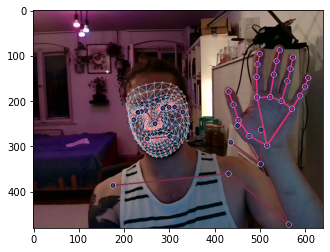

In [67]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

Durch das gut funktionierende MediaPipe ist selbst bei schlechten Lichtverhältnissen, wie in dem Beispiel mein dunkles Zimmer, eine Extraktion  der Keypoints möglich.

In [69]:
results.pose_landmarks.landmark[0].visibility

0.9999949336051941

# Fehlerbehandlung falls Array leer ist

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [16]:
pose.shape


(132,)

In [17]:


def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])




# Folders

In [20]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('C://Users/milan/CI/Project/data_self/') 

#actions = np.array(['Doing other things', 'Drumming Fingers', 'No gesture', 'Pulling Hand In','Pulling Two Fingers In','Pushing Hand Away','Pushing Hand Away','Pushing Two Fingers Away','Rolling Hand Backward','Rolling Hand Forward','Shaking Hand','Sliding Two Fingers Down','Sliding Two Fingers Left','Sliding Two Fingers Right','Sliding Two Fingers Up','Stop Sign','Swiping Down','Swiping Left','Swiping Right','Swiping Up','Thumb Down','Thumb Up','Turning Hand Clockwise','Turning Hand Counterclockwise','Zooming In With Full Hand','Zooming In With Two Fingers','Zooming Out With Full Hand','Zooming Out With Two Fingers'])
# Actions that we try to detect
actions = np.array(['hi', 'thanks', 'iloveyou'])
# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

                    

In [25]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except Exception as error:
             print("An error occurred:", error) 

In [69]:


cap = cv2.VideoCapture(1)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [70]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical



In [71]:
label_map = {label:num for num, label in enumerate(actions)}


In [72]:


label_map



{'hi': 0, 'thanks': 1, 'iloveyou': 2}

In [73]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [74]:
np.array(sequences).shape

(90, 30, 1662)

In [75]:


np.array(labels).shape



(90,)

In [76]:


X = np.array(sequences)



In [77]:


X.shape



(90, 30, 1662)

In [78]:


y = to_categorical(labels).astype(int)



In [79]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [59]:


y_test.shape



(5, 3)

In [60]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard



In [61]:


log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)



In [98]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [99]:
res = [.7, 0.2, 0.1]

In [100]:
actions[np.argmax(res)]

'hi'

In [101]:


model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])



In [102]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 314ms/step - loss: 1.6362 - categorical_accuracy: 0.2235
Epoch 2/2000
3/3 [==============================] - 1s 318ms/step - loss: 1.9105 - categorical_accuracy: 0.3882
Epoch 3/2000
3/3 [==============================] - 1s 322ms/step - loss: 13.8435 - categorical_accuracy: 0.3059
Epoch 4/2000
3/3 [==============================] - 1s 317ms/step - loss: 13.9729 - categorical_accuracy: 0.3412
Epoch 5/2000
3/3 [==============================] - 1s 320ms/step - loss: 5.4647 - categorical_accuracy: 0.3176
Epoch 6/2000
3/3 [==============================] - 1s 317ms/step - loss: 3.0291 - categorical_accuracy: 0.3765
Epoch 7/2000
3/3 [==============================] - 1s 317ms/step - loss: 1.6973 - categorical_accuracy: 0.4706
Epoch 8/2000
3/3 [==============================] - 1s 314ms/step - loss: 1.6521 - categorical_accuracy: 0.3882
Epoch 9/2000
3/3 [==============================] - 1s 315ms/step - loss: 1.7016 - categorical_accurac

3/3 [==============================] - 1s 315ms/step - loss: 0.6225 - categorical_accuracy: 0.6588
Epoch 146/2000
3/3 [==============================] - 1s 314ms/step - loss: 0.6202 - categorical_accuracy: 0.6118
Epoch 147/2000
3/3 [==============================] - 1s 315ms/step - loss: 0.6039 - categorical_accuracy: 0.6588
Epoch 148/2000
3/3 [==============================] - 1s 310ms/step - loss: 0.6239 - categorical_accuracy: 0.5882
Epoch 149/2000
3/3 [==============================] - 1s 314ms/step - loss: 0.6083 - categorical_accuracy: 0.7059
Epoch 150/2000
3/3 [==============================] - 1s 316ms/step - loss: 0.6022 - categorical_accuracy: 0.6588
Epoch 151/2000
3/3 [==============================] - 1s 317ms/step - loss: 0.6048 - categorical_accuracy: 0.6588
Epoch 152/2000
3/3 [==============================] - 1s 315ms/step - loss: 0.5997 - categorical_accuracy: 0.6588
Epoch 153/2000
3/3 [==============================] - 1s 316ms/step - loss: 0.5709 - categorical_accura

Epoch 217/2000
3/3 [==============================] - 1s 333ms/step - loss: 0.5830 - categorical_accuracy: 0.6941
Epoch 218/2000
3/3 [==============================] - 1s 326ms/step - loss: 0.5766 - categorical_accuracy: 0.7059
Epoch 219/2000
3/3 [==============================] - 1s 317ms/step - loss: 0.6126 - categorical_accuracy: 0.6353
Epoch 220/2000
3/3 [==============================] - 1s 324ms/step - loss: 0.6506 - categorical_accuracy: 0.6471
Epoch 221/2000
3/3 [==============================] - 1s 323ms/step - loss: 0.6103 - categorical_accuracy: 0.5882
Epoch 222/2000
3/3 [==============================] - 1s 318ms/step - loss: 0.6366 - categorical_accuracy: 0.6471
Epoch 223/2000
3/3 [==============================] - 1s 319ms/step - loss: 0.6230 - categorical_accuracy: 0.6588
Epoch 224/2000
3/3 [==============================] - 1s 321ms/step - loss: 0.6031 - categorical_accuracy: 0.6588
Epoch 225/2000
3/3 [==============================] - 1s 327ms/step - loss: 0.6105 - cat

Epoch 360/2000
3/3 [==============================] - 1s 311ms/step - loss: 0.2873 - categorical_accuracy: 0.9294
Epoch 361/2000
3/3 [==============================] - 1s 329ms/step - loss: 0.2763 - categorical_accuracy: 0.9176
Epoch 362/2000
3/3 [==============================] - 1s 314ms/step - loss: 0.3682 - categorical_accuracy: 0.8824
Epoch 363/2000
3/3 [==============================] - 1s 314ms/step - loss: 0.3618 - categorical_accuracy: 0.8941
Epoch 364/2000
3/3 [==============================] - 1s 313ms/step - loss: 0.4420 - categorical_accuracy: 0.9176
Epoch 365/2000
3/3 [==============================] - 1s 310ms/step - loss: 0.3968 - categorical_accuracy: 0.8941
Epoch 366/2000
3/3 [==============================] - 1s 316ms/step - loss: 0.3455 - categorical_accuracy: 0.9059
Epoch 367/2000
3/3 [==============================] - 1s 312ms/step - loss: 0.3583 - categorical_accuracy: 0.8941
Epoch 368/2000
3/3 [==============================] - 1s 314ms/step - loss: 0.4225 - cat

Epoch 503/2000
3/3 [==============================] - 1s 308ms/step - loss: 1.9943 - categorical_accuracy: 0.5647
Epoch 504/2000
3/3 [==============================] - 1s 310ms/step - loss: 1.7869 - categorical_accuracy: 0.2941
Epoch 505/2000
3/3 [==============================] - 1s 310ms/step - loss: 1.2128 - categorical_accuracy: 0.3412
Epoch 506/2000
3/3 [==============================] - 1s 312ms/step - loss: 2.3908 - categorical_accuracy: 0.3529
Epoch 507/2000
3/3 [==============================] - 1s 312ms/step - loss: 17.5007 - categorical_accuracy: 0.3059
Epoch 508/2000
3/3 [==============================] - 1s 311ms/step - loss: 19.9578 - categorical_accuracy: 0.2353
Epoch 509/2000
3/3 [==============================] - 1s 312ms/step - loss: 63.5295 - categorical_accuracy: 0.3765
Epoch 510/2000
3/3 [==============================] - 1s 310ms/step - loss: 50.8999 - categorical_accuracy: 0.3176
Epoch 511/2000
3/3 [==============================] - 1s 308ms/step - loss: 124.4495

Epoch 646/2000
3/3 [==============================] - 1s 313ms/step - loss: 1.0112 - categorical_accuracy: 0.6353
Epoch 647/2000
3/3 [==============================] - 1s 313ms/step - loss: 1.0097 - categorical_accuracy: 0.6235
Epoch 648/2000
3/3 [==============================] - 1s 312ms/step - loss: 1.0113 - categorical_accuracy: 0.5765
Epoch 649/2000
3/3 [==============================] - 1s 309ms/step - loss: 1.0082 - categorical_accuracy: 0.5765
Epoch 650/2000
3/3 [==============================] - 1s 312ms/step - loss: 1.0115 - categorical_accuracy: 0.6471
Epoch 651/2000
3/3 [==============================] - 1s 312ms/step - loss: 1.0055 - categorical_accuracy: 0.6471
Epoch 652/2000
3/3 [==============================] - 1s 314ms/step - loss: 1.0060 - categorical_accuracy: 0.6000
Epoch 653/2000
3/3 [==============================] - 1s 311ms/step - loss: 1.0019 - categorical_accuracy: 0.5882
Epoch 654/2000
3/3 [==============================] - 1s 316ms/step - loss: 1.0010 - cat

Epoch 789/2000
3/3 [==============================] - 1s 309ms/step - loss: 0.9245 - categorical_accuracy: 0.5647
Epoch 790/2000
3/3 [==============================] - 1s 304ms/step - loss: 0.8283 - categorical_accuracy: 0.6824
Epoch 791/2000
3/3 [==============================] - 1s 312ms/step - loss: 0.7886 - categorical_accuracy: 0.7059
Epoch 792/2000
3/3 [==============================] - 1s 307ms/step - loss: 0.7670 - categorical_accuracy: 0.6588
Epoch 793/2000
3/3 [==============================] - 1s 307ms/step - loss: 0.8081 - categorical_accuracy: 0.6235
Epoch 794/2000
3/3 [==============================] - 1s 306ms/step - loss: 0.8311 - categorical_accuracy: 0.6000
Epoch 795/2000
3/3 [==============================] - 1s 307ms/step - loss: 0.7653 - categorical_accuracy: 0.6588
Epoch 796/2000
3/3 [==============================] - 1s 307ms/step - loss: 0.7465 - categorical_accuracy: 0.6706
Epoch 797/2000
3/3 [==============================] - 1s 305ms/step - loss: 0.7546 - cat

Epoch 932/2000
3/3 [==============================] - 1s 302ms/step - loss: 1.2328 - categorical_accuracy: 0.3647
Epoch 933/2000
3/3 [==============================] - 1s 308ms/step - loss: 1.2925 - categorical_accuracy: 0.3059
Epoch 934/2000
3/3 [==============================] - 1s 302ms/step - loss: 1.1819 - categorical_accuracy: 0.2941
Epoch 935/2000
3/3 [==============================] - 1s 307ms/step - loss: 1.2389 - categorical_accuracy: 0.2353
Epoch 936/2000
3/3 [==============================] - 1s 304ms/step - loss: 1.2190 - categorical_accuracy: 0.2588
Epoch 937/2000
3/3 [==============================] - 1s 302ms/step - loss: 1.1551 - categorical_accuracy: 0.2235
Epoch 938/2000
3/3 [==============================] - 1s 305ms/step - loss: 0.9348 - categorical_accuracy: 0.5882
Epoch 939/2000
3/3 [==============================] - 1s 301ms/step - loss: 0.9763 - categorical_accuracy: 0.5529
Epoch 940/2000
3/3 [==============================] - 1s 311ms/step - loss: 0.9297 - cat

3/3 [==============================] - 1s 311ms/step - loss: 0.6364 - categorical_accuracy: 0.6706
Epoch 1075/2000
3/3 [==============================] - 1s 302ms/step - loss: 0.6416 - categorical_accuracy: 0.6588
Epoch 1076/2000
3/3 [==============================] - 1s 307ms/step - loss: 0.6339 - categorical_accuracy: 0.6588
Epoch 1077/2000
3/3 [==============================] - 1s 302ms/step - loss: 0.6363 - categorical_accuracy: 0.6706
Epoch 1078/2000
3/3 [==============================] - 1s 300ms/step - loss: 0.6336 - categorical_accuracy: 0.6706
Epoch 1079/2000
3/3 [==============================] - 1s 305ms/step - loss: 0.6376 - categorical_accuracy: 0.6353
Epoch 1080/2000
3/3 [==============================] - 1s 305ms/step - loss: 0.6342 - categorical_accuracy: 0.6588
Epoch 1081/2000
3/3 [==============================] - 1s 303ms/step - loss: 0.6406 - categorical_accuracy: 0.6824
Epoch 1082/2000
3/3 [==============================] - 1s 305ms/step - loss: 0.6338 - categorica

3/3 [==============================] - 1s 305ms/step - loss: 0.6096 - categorical_accuracy: 0.6588
Epoch 1217/2000
3/3 [==============================] - 1s 306ms/step - loss: 0.6033 - categorical_accuracy: 0.6706
Epoch 1218/2000
3/3 [==============================] - 1s 301ms/step - loss: 0.6019 - categorical_accuracy: 0.7176
Epoch 1219/2000
3/3 [==============================] - 1s 304ms/step - loss: 0.6036 - categorical_accuracy: 0.7529
Epoch 1220/2000
3/3 [==============================] - 1s 300ms/step - loss: 0.6010 - categorical_accuracy: 0.7176
Epoch 1221/2000
3/3 [==============================] - 1s 305ms/step - loss: 0.6055 - categorical_accuracy: 0.6706
Epoch 1222/2000
3/3 [==============================] - 1s 305ms/step - loss: 0.6076 - categorical_accuracy: 0.6588
Epoch 1223/2000
3/3 [==============================] - 1s 302ms/step - loss: 0.6049 - categorical_accuracy: 0.6706
Epoch 1224/2000
3/3 [==============================] - 1s 314ms/step - loss: 0.6005 - categorica

3/3 [==============================] - 1s 299ms/step - loss: 0.5756 - categorical_accuracy: 0.7765
Epoch 1359/2000
3/3 [==============================] - 1s 305ms/step - loss: 0.6096 - categorical_accuracy: 0.6706
Epoch 1360/2000
3/3 [==============================] - 1s 303ms/step - loss: 0.5894 - categorical_accuracy: 0.7176
Epoch 1361/2000
3/3 [==============================] - 1s 303ms/step - loss: 0.6022 - categorical_accuracy: 0.7059
Epoch 1362/2000
3/3 [==============================] - 1s 301ms/step - loss: 0.5994 - categorical_accuracy: 0.7059
Epoch 1363/2000
3/3 [==============================] - 1s 299ms/step - loss: 0.5817 - categorical_accuracy: 0.7529
Epoch 1364/2000
3/3 [==============================] - 1s 301ms/step - loss: 0.6093 - categorical_accuracy: 0.6588
Epoch 1365/2000
3/3 [==============================] - 1s 297ms/step - loss: 0.6219 - categorical_accuracy: 0.7176
Epoch 1366/2000
3/3 [==============================] - 1s 305ms/step - loss: 0.5921 - categorica

3/3 [==============================] - 1s 298ms/step - loss: 0.5828 - categorical_accuracy: 0.7294
Epoch 1501/2000
3/3 [==============================] - 1s 316ms/step - loss: 0.5779 - categorical_accuracy: 0.7294
Epoch 1502/2000
3/3 [==============================] - 1s 304ms/step - loss: 0.5898 - categorical_accuracy: 0.6588
Epoch 1503/2000
3/3 [==============================] - 1s 321ms/step - loss: 0.5876 - categorical_accuracy: 0.7059
Epoch 1504/2000
3/3 [==============================] - 1s 327ms/step - loss: 0.5798 - categorical_accuracy: 0.7529
Epoch 1505/2000
3/3 [==============================] - 1s 300ms/step - loss: 0.5862 - categorical_accuracy: 0.7059
Epoch 1506/2000
3/3 [==============================] - 1s 313ms/step - loss: 0.5966 - categorical_accuracy: 0.6706
Epoch 1507/2000
3/3 [==============================] - 1s 300ms/step - loss: 0.5726 - categorical_accuracy: 0.7059
Epoch 1508/2000
3/3 [==============================] - 1s 310ms/step - loss: 0.5807 - categorica

3/3 [==============================] - 1s 305ms/step - loss: 0.7254 - categorical_accuracy: 0.6353
Epoch 1643/2000
3/3 [==============================] - 1s 310ms/step - loss: 0.6394 - categorical_accuracy: 0.6588
Epoch 1644/2000
3/3 [==============================] - 1s 305ms/step - loss: 0.6765 - categorical_accuracy: 0.6471
Epoch 1645/2000
3/3 [==============================] - 1s 305ms/step - loss: 0.6914 - categorical_accuracy: 0.6588
Epoch 1646/2000
3/3 [==============================] - 1s 310ms/step - loss: 0.7120 - categorical_accuracy: 0.6706
Epoch 1647/2000
3/3 [==============================] - 1s 304ms/step - loss: 0.8077 - categorical_accuracy: 0.6000
Epoch 1648/2000
3/3 [==============================] - 1s 307ms/step - loss: 0.9741 - categorical_accuracy: 0.4941
Epoch 1649/2000
3/3 [==============================] - 1s 306ms/step - loss: 0.8585 - categorical_accuracy: 0.5765
Epoch 1650/2000
3/3 [==============================] - 1s 308ms/step - loss: 0.7232 - categorica

3/3 [==============================] - 1s 306ms/step - loss: 0.5993 - categorical_accuracy: 0.7059
Epoch 1785/2000
3/3 [==============================] - 1s 304ms/step - loss: 0.6013 - categorical_accuracy: 0.6824
Epoch 1786/2000
3/3 [==============================] - 1s 313ms/step - loss: 0.5940 - categorical_accuracy: 0.6706
Epoch 1787/2000
3/3 [==============================] - 1s 309ms/step - loss: 0.5804 - categorical_accuracy: 0.6588
Epoch 1788/2000
3/3 [==============================] - 1s 309ms/step - loss: 0.6008 - categorical_accuracy: 0.6706
Epoch 1789/2000
3/3 [==============================] - 1s 310ms/step - loss: 0.5830 - categorical_accuracy: 0.7294
Epoch 1790/2000
3/3 [==============================] - 1s 310ms/step - loss: 0.5914 - categorical_accuracy: 0.7059
Epoch 1791/2000
3/3 [==============================] - 1s 307ms/step - loss: 0.5766 - categorical_accuracy: 0.6941
Epoch 1792/2000
3/3 [==============================] - 1s 304ms/step - loss: 0.5788 - categorica

3/3 [==============================] - 1s 303ms/step - loss: 0.6839 - categorical_accuracy: 0.6588
Epoch 1927/2000
3/3 [==============================] - 1s 308ms/step - loss: 0.6616 - categorical_accuracy: 0.6824
Epoch 1928/2000
3/3 [==============================] - 1s 306ms/step - loss: 0.6736 - categorical_accuracy: 0.6471
Epoch 1929/2000
3/3 [==============================] - 1s 305ms/step - loss: 0.6181 - categorical_accuracy: 0.6353
Epoch 1930/2000
3/3 [==============================] - 1s 309ms/step - loss: 0.6292 - categorical_accuracy: 0.6353
Epoch 1931/2000
3/3 [==============================] - 1s 303ms/step - loss: 0.6283 - categorical_accuracy: 0.6706
Epoch 1932/2000
3/3 [==============================] - 1s 305ms/step - loss: 0.6211 - categorical_accuracy: 0.6471
Epoch 1933/2000
3/3 [==============================] - 1s 311ms/step - loss: 0.6072 - categorical_accuracy: 0.6706
Epoch 1934/2000
3/3 [==============================] - 1s 306ms/step - loss: 0.6120 - categorica

In [103]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

In [104]:
res = model.predict(X_test)

1/1 [==============================] - 0s 302ms/step


In [105]:


actions[np.argmax(res[1])]



'thanks'

In [106]:
actions[np.argmax(y_test[1])]

'thanks'

In [107]:


model.save('action2.keras')



In [96]:
del model

In [40]:
model.load_weights('action.keras')

# Evaluation using Confusion Matrix and Accuracy

In [108]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)


accuracy_score(ytrue, yhat)



1/1 [==============================] - 0s 91ms/step


0.4

In [42]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

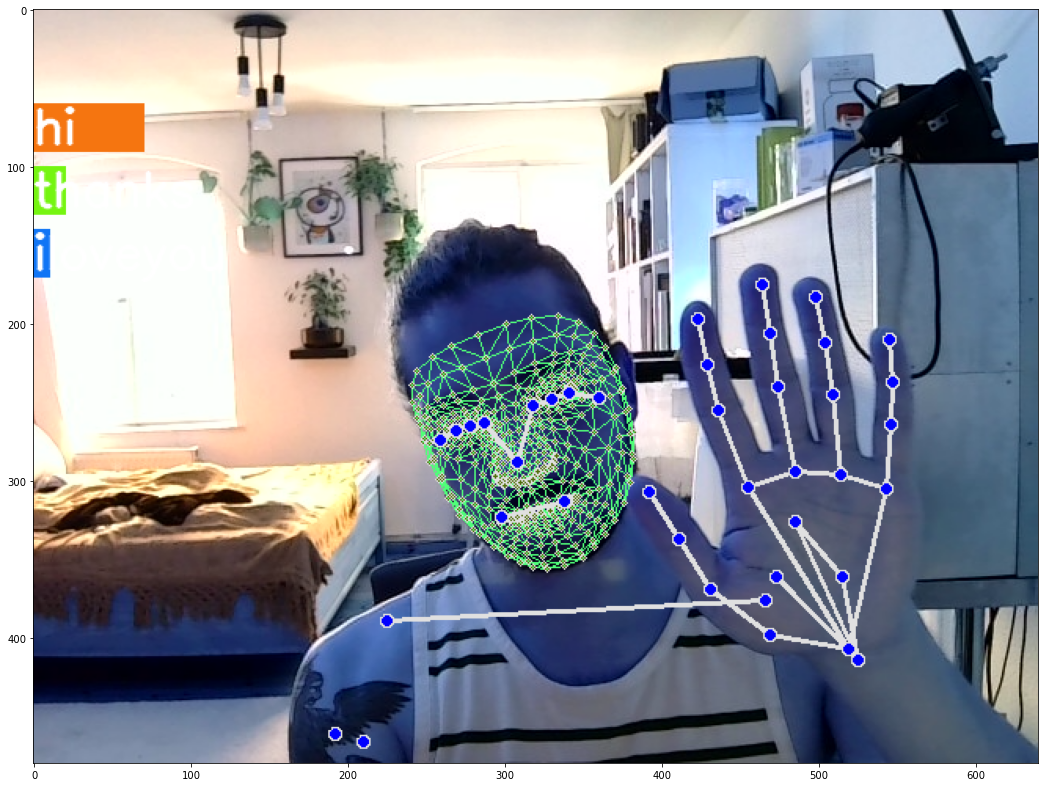

In [43]:


plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))



In [82]:
sequence.reverse()
len(sequence)

30

In [83]:


sequence.append('def')
sequence.reverse()
sequence[-30:]

[array([ 0.64718401,  0.59472847, -1.20377278, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.64836162,  0.59484005, -1.22320199, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.64833802,  0.59500325, -1.22080326, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.65003937,  0.59535712, -1.23207617, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.6514864 ,  0.59544873, -1.23201752, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.65330875,  0.59581155, -1.29943538, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.65355957,  0.59617174, -1.25681233, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.65348709,  0.59654135, -1.21696973, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.65344125,  0.59664881, -1.21850312, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.65340269,  0.59618747, -1.21890116, ...,  0.        ,
         0.        ,  0.  

In [109]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 14ms/step
hi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hi
<class 'mediapipe.python.solution_base.SolutionOu

1/1 [==============================] - 0s 13ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'm